In [1]:
# IE 6400 Project 1 by Edward Brown

# Step 1: Importing the dataset

import pandas as pd

# Load the dataset
df = pd.read_csv('documents/school/spring 24/IE 6400/democracy_index.csv')

# Checking to make sure data is imported correctly
print(df.head())


   Unnamed: 0 rank      country  democracy_index  \
0           0    1       Norway             9.87   
1           1    2      Iceland             9.58   
2           2    3       Sweden             9.39   
3           3    4  New Zealand             9.26   
4           4    5      Denmark             9.22   

   electoral_processand_pluralism  functioning_of_government  \
0                           10.00                       9.64   
1                           10.00                       9.29   
2                            9.58                       9.64   
3                           10.00                       9.29   
4                           10.00                       9.29   

   political_participation  political_culture  civil_liberties        category  
0                    10.00              10.00             9.71  Full democracy  
1                     8.89              10.00             9.71  Full democracy  
2                     8.33              10.00             9

In [2]:
## Step 2 part 1 Pre-process data: Check for Missing or Null Values

print(df.isnull().sum())

## It is unlikely that it is necessary to preprocess this data and check for missing or null values. This dataset was already prepared and preprocessed by The Economist before release.

Unnamed: 0                        0
rank                              0
country                           0
democracy_index                   0
electoral_processand_pluralism    0
functioning_of_government         0
political_participation           0
political_culture                 0
civil_liberties                   0
category                          0
dtype: int64


Since this data was already processed by The Economist, it should not contain and null or missing values. However checking for these values is extremely crucial to the accuracy of our analysis, so I performed it regardless.

In [3]:
# Step 2: Cleaning the data


# Dropping the unnamed index column, it is not needed

df_cleaned = df.drop(columns=['Unnamed: 0'])

# Indicating which columns of the democracy index values will be analyzed

criteria_columns = ['electoral_processand_pluralism', 'functioning_of_government', 'political_participation', 'political_culture', 'civil_liberties']
criteria_data = df_cleaned[criteria_columns]

# Making sure the data was cleaned correctly

df_cleaned.head(), criteria_data.head()


(  rank      country  democracy_index  electoral_processand_pluralism  \
 0    1       Norway             9.87                           10.00   
 1    2      Iceland             9.58                           10.00   
 2    3       Sweden             9.39                            9.58   
 3    4  New Zealand             9.26                           10.00   
 4    5      Denmark             9.22                           10.00   
 
    functioning_of_government  political_participation  political_culture  \
 0                       9.64                    10.00              10.00   
 1                       9.29                     8.89              10.00   
 2                       9.64                     8.33              10.00   
 3                       9.29                     8.89               8.13   
 4                       9.29                     8.33               9.38   
 
    civil_liberties        category  
 0             9.71  Full democracy  
 1             9.71 

I printed the head to determine that my dataframe is correct. I could have dropped more columns from the frame, such as the "country" column. However I decided it could have potential use for later analysis, so I decided to keep it in the frame as it does not add much verbosity to our frame.

In [4]:
# Step 3: Scaling the data

from sklearn.preprocessing import StandardScaler, normalize

# Scaling the criteria data

scaler = StandardScaler()
scaled_criteria = scaler.fit_transform(criteria_data)

# Normalizing the scaled data

normalized_criteria = normalize(scaled_criteria)

# Creating a new DataFrame for the preprocessed data

preprocessed_data = pd.DataFrame(normalized_criteria, columns=criteria_columns)

preprocessed_data.head()

electoral_processand_pluralism  functioning_of_government  \
0                        0.254869                   0.415156   
1                        0.276886                   0.417824   
2                        0.257054                   0.466541   
3                        0.320721                   0.483971   
4                        0.310077                   0.467908   

   political_participation  political_culture  civil_liberties  
0                 0.557478           0.588801         0.324374  
1                 0.464115           0.639665         0.352395  
2                 0.406232           0.661678         0.336779  
3                 0.537591           0.426468         0.438214  
4                 0.439793           0.615541         0.335567

3.A: It is important to scale the data for K-means and Hierarchical clustering because these clustering methods are based on distance. Therefore, the scale of the data is crucial.

3.B: This question is difficult for me to answer concisely. I believe that it is not strictly necessary to scale this dataset, due to the fact that all values are withing a 0-10 range. Since their are no outliers to this range, there is no need to scale. However It could be beneficial to scale anyway to reduce the distance. With distance reduction in mind, I decided to scale the dataset.


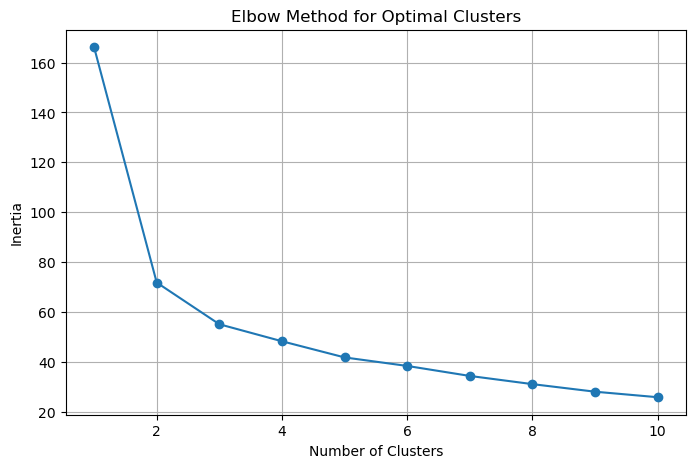

In [5]:
# Step 4: Using the Elbow Method With Inertia to Determine Number of Clusters

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Finding the optimal number of clusters using the elbow method

inertia = []
for i in range(1, 11): # Setting the range for analysis

    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42) # Set n_init=10 to avoid a warning
    kmeans.fit(preprocessed_data)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


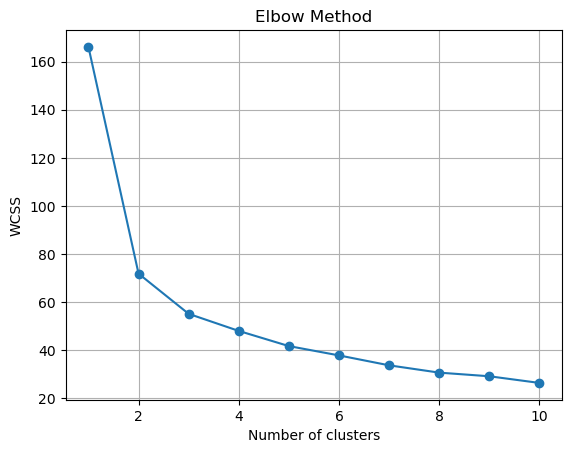

In [6]:
# Step 4B: Utilizing the Elbow Method Via WCSS to determine number of clusters

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

# Implement the Elbow Method to determine the appropriate number of clusters

wcss = []  ## within cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)## Setting n_init=10 to avoid a "future warning"
    kmeans.fit(preprocessed_data)
    wcss.append(kmeans.inertia_)

# Plot a graph of the Elbow Method's output

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [7]:
# Step 4C: Confirmation of Elbow Method Cluster output
#%pip install --upgrade kneed
# Once the install has occured once it is no longer necessary, so I commented it out

from kneed import KneeLocator

# Utilizing our pre-calculated WCSS to determine the "elbow" via the Kneed package

kn = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
print('Optimal number of clusters:', kn.knee)

Optimal number of clusters: 3


4.B) It is interesting that the optimal number of clusters is 3, since I believe it should be 4 based on the number of regimes. I am not familiar with this package, and only discovered it through Google.

After considering the possibilities for this, it makes sense that an analysis could return 3 clusters as optimal. The nature of the categories could have potential overlap. Our analysis may be combining either the "Full Democracy" & "Flawed Democracy" regime types, or possibly "Hybrid Regime" & "Flawed Democracy"

4.C) I do not believe it was necessary to use the elbow method to determine our number of clusters. This is due to the fact that the number of clusters is predetermined by the number of regimes that we are grouping our data into.

In [8]:
# Applying KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42) # N_init is again set to 10 to avoid a warning
clusters = kmeans.fit_predict(preprocessed_data)

# Adding the cluster labels to the original dataframe
df_cleaned['Cluster'] = clusters

# Checking output
df_cleaned.head()

rank      country  democracy_index  electoral_processand_pluralism  \
0    1       Norway             9.87                           10.00   
1    2      Iceland             9.58                           10.00   
2    3       Sweden             9.39                            9.58   
3    4  New Zealand             9.26                           10.00   
4    5      Denmark             9.22                           10.00   

   functioning_of_government  political_participation  political_culture  \
0                       9.64                    10.00              10.00   
1                       9.29                     8.89              10.00   
2                       9.64                     8.33              10.00   
3                       9.29                     8.89               8.13   
4                       9.29                     8.33               9.38   

   civil_liberties        category  Cluster  
0             9.71  Full democracy        0  
1             9.71  Full democracy        0  
2             9.41  Full democracy        0  
3            10.00  Full democracy        0  
4             9.12  Full democracy        0

I decided to proceed with the K-means clustering analysis using 4 clusters despite the elbow methods output. I believe that due to the nature of our data it is highly subjective how many clusters there should be. Also, the instructions for our assignment reveal that the actual number of clusters is 4, corresponding to the regime types.

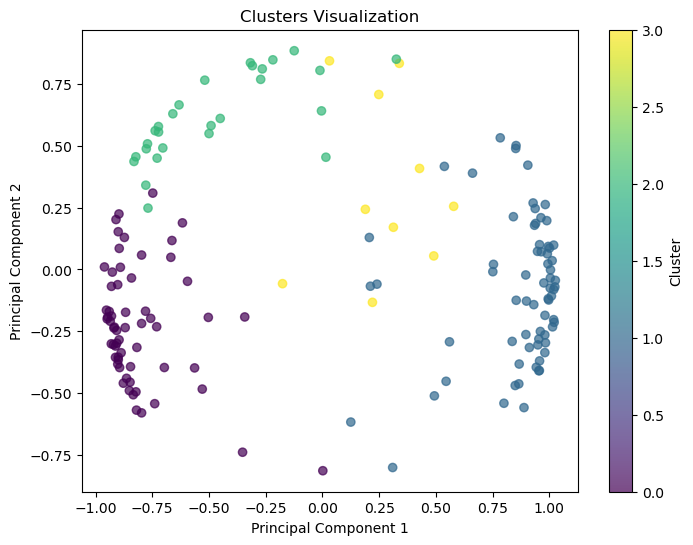

In [9]:
# Visualizing our K-means clustering

from sklearn.decomposition import PCA

# Reducing dimensions for visualization

pca = PCA(n_components=2)
principal_components = pca.fit_transform(preprocessed_data)

# Plotting the clusters

plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.7)
plt.title('Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


I learned in office hours on Saturday 2/17 that this visualization is not part of the project, however I had already completed most of my project by this time and spent a condiserable amount of time on this portion in particular, so I have decided to leave it in.

Visualizing a k-means clustering of data with 5 dimensions via a scatterplot was a challenge for me. Initially I looked at our lab for week 6 for guidance, but that was using generated data with only 2 dimensions. After researching and reading in our texts, I discovered the principal component analysis function. This reduces our dimensionality, allowing us to utilize a scatterplot for analysis.

However, I feel that my scatterplot using this function looks strange and not what I would expect. I suspect that the PCA function has caused some loss of semantics of some type. I am also unsure of how PCA works at a high level, so perhaps I missed a step, or implemented it incorrectly.

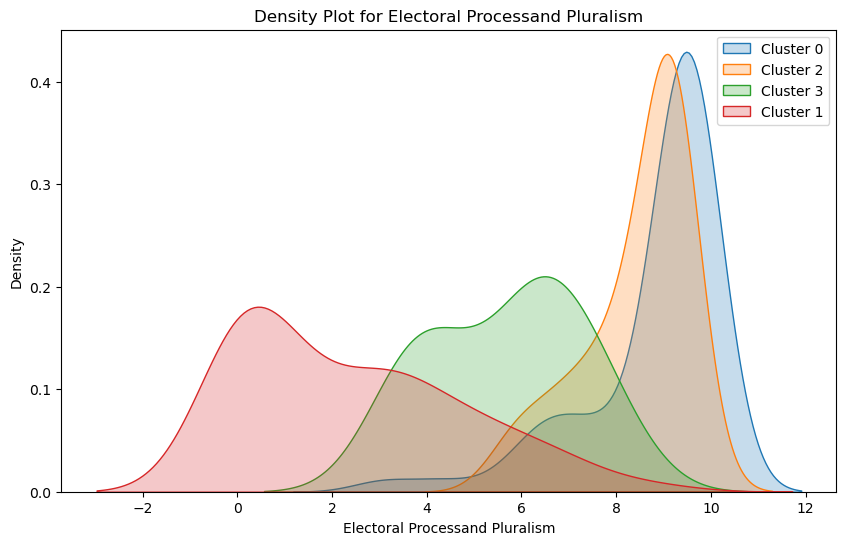

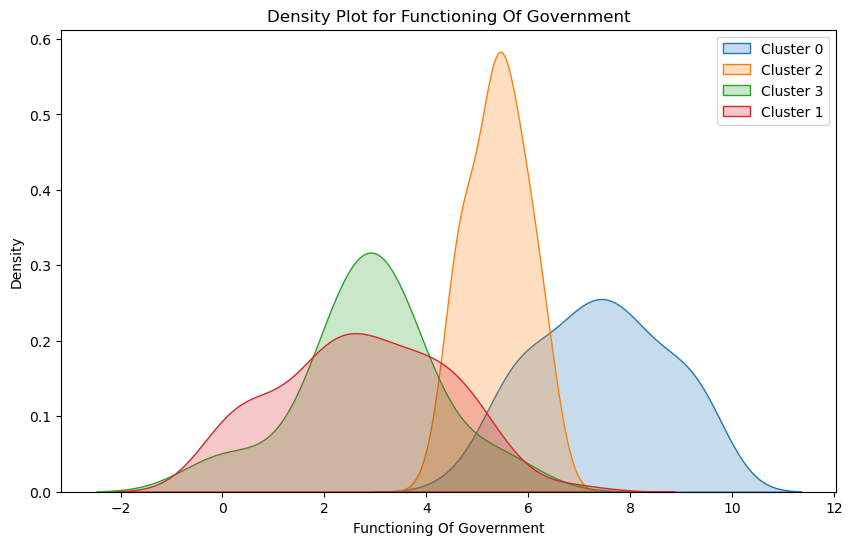

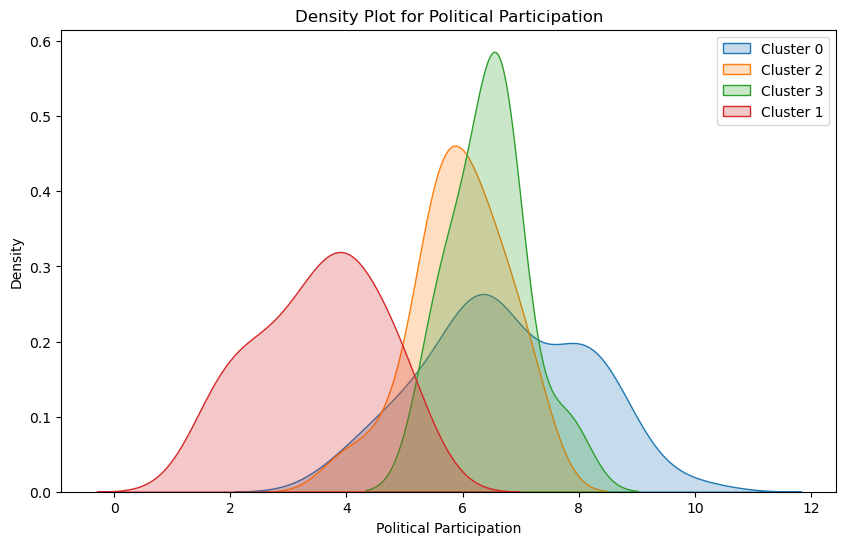

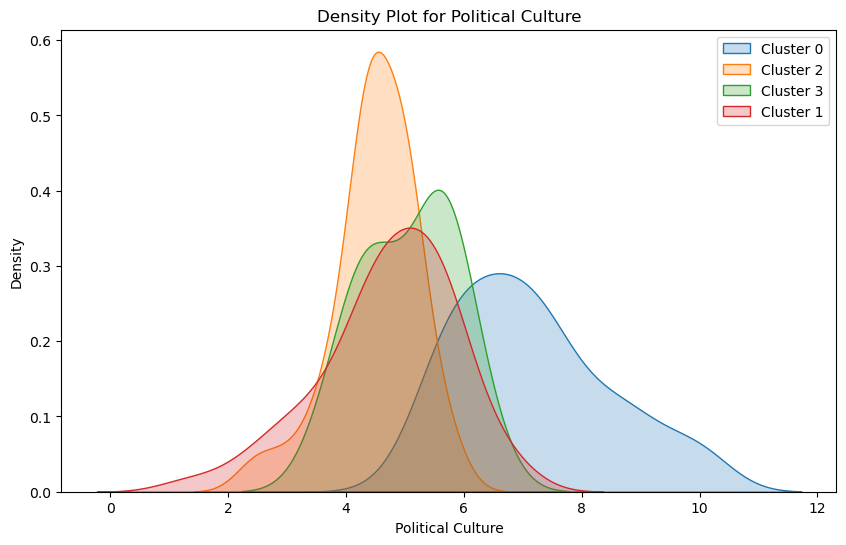

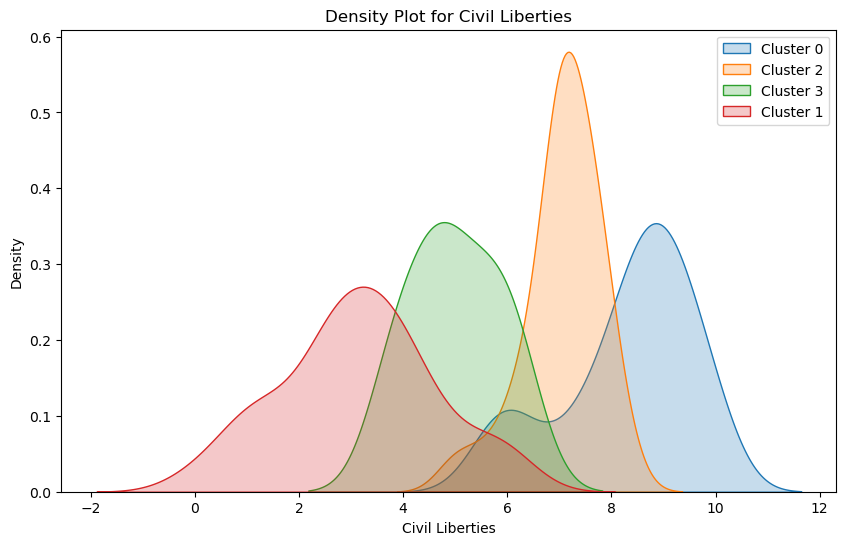

In [10]:
# Importing the seaborn library for density plots
import seaborn as sns

# Regenerating density plots for each criterion across the clusters
for criterion in criteria_columns:  # Reusing the list of criteria columns
    plt.figure(figsize=(10, 6))
    for cluster in df_cleaned['Cluster'].unique():
        subset = df_cleaned[df_cleaned['Cluster'] == cluster]
        sns.kdeplot(subset[criterion], fill=True, label=f'Cluster {cluster}')
    plt.title(f'Density Plot for {criterion.replace("_", " ").title()}')
    plt.xlabel(criterion.replace("_", " ").title())
    plt.ylabel('Density')
    plt.legend()
    plt.show()

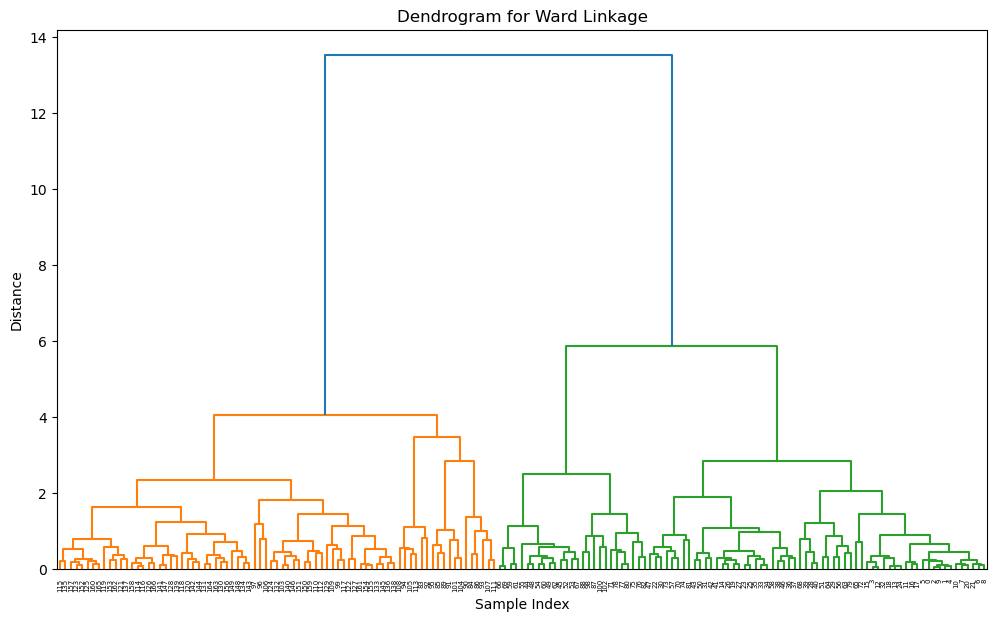

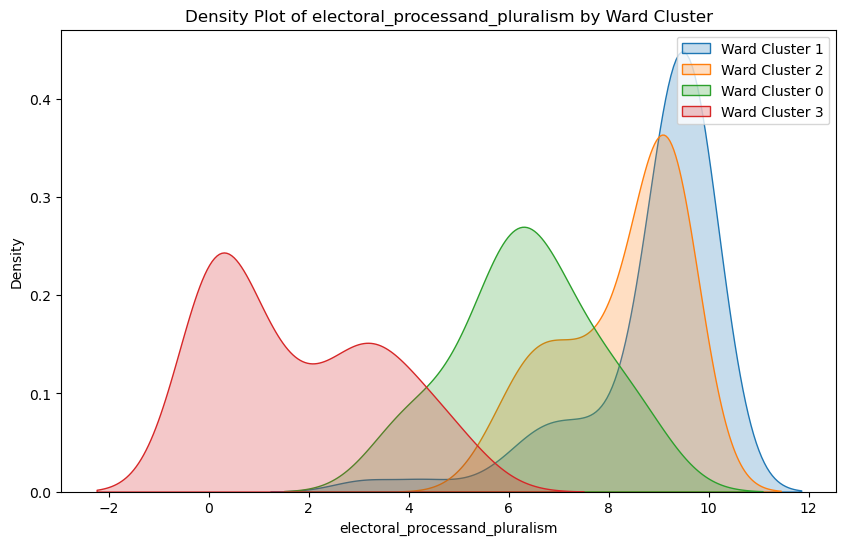

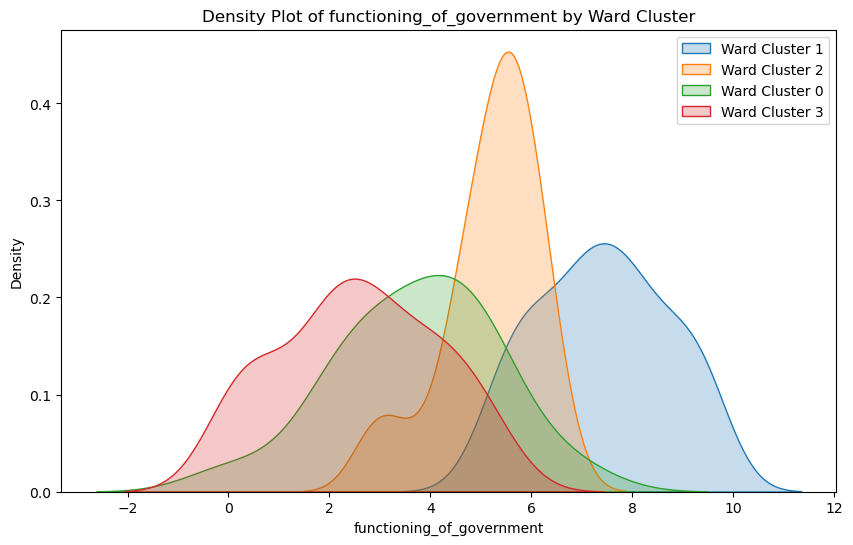

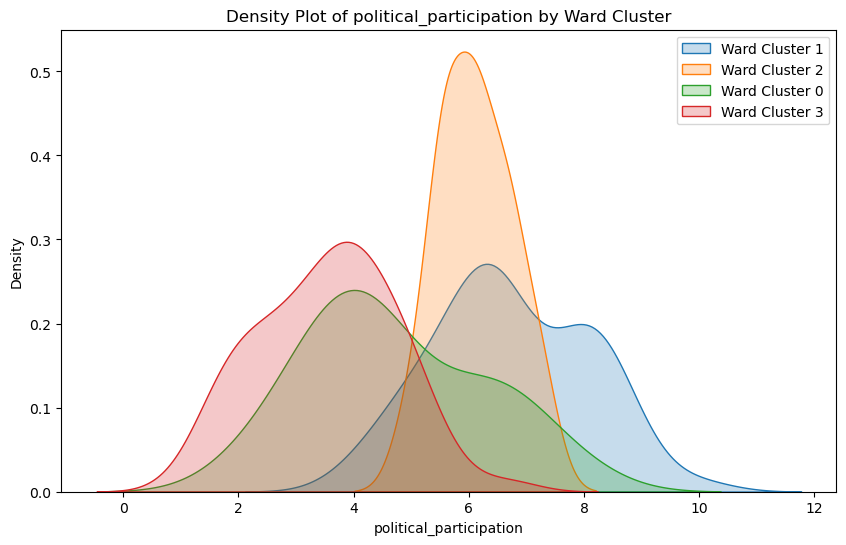

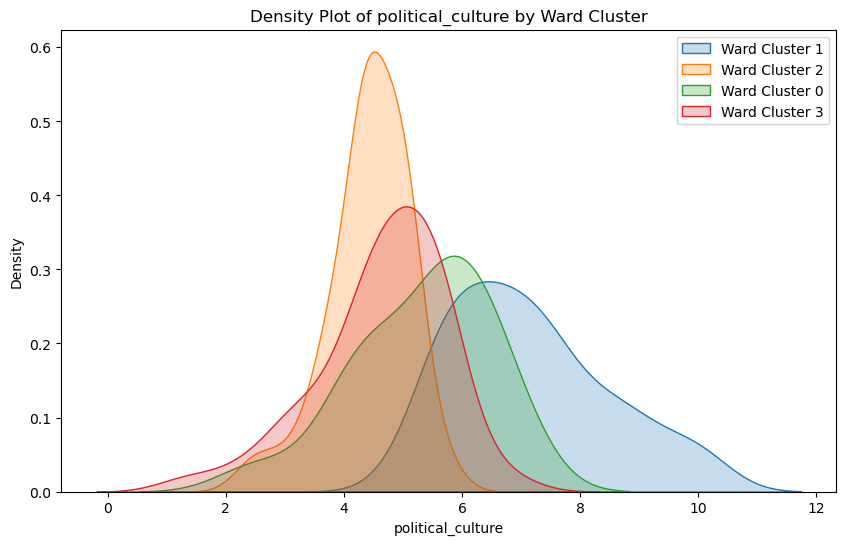

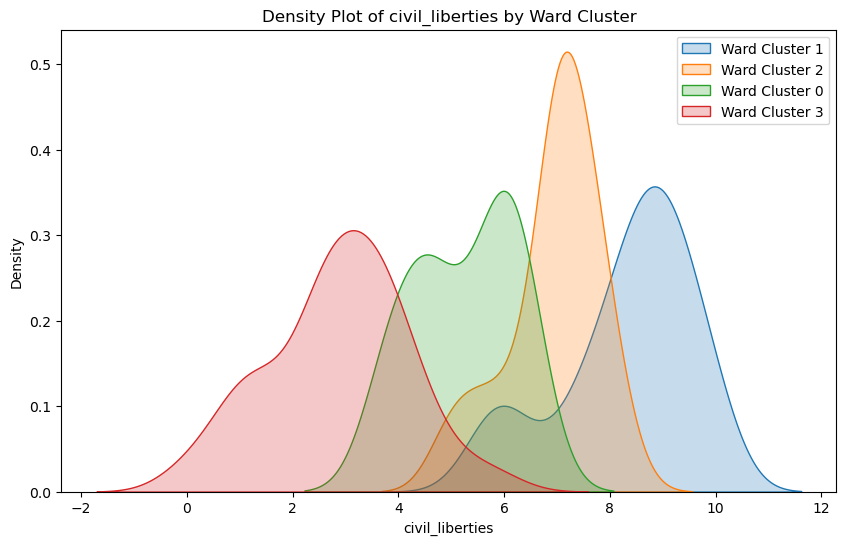

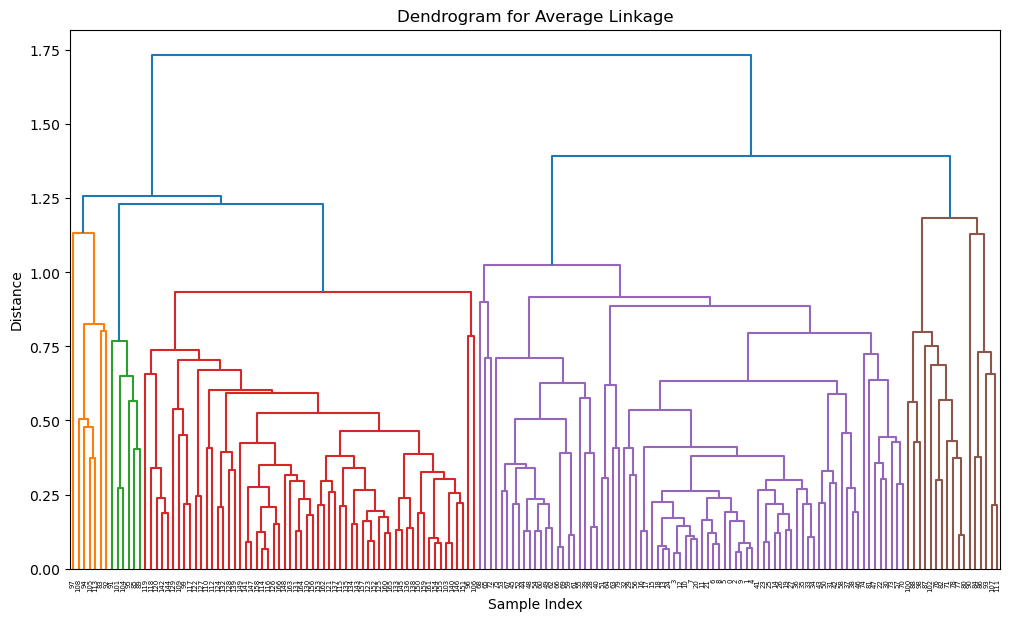

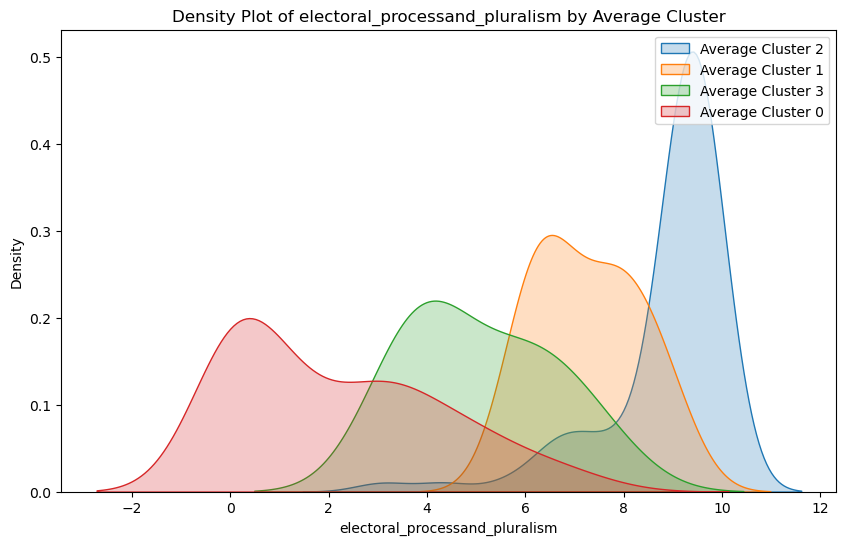

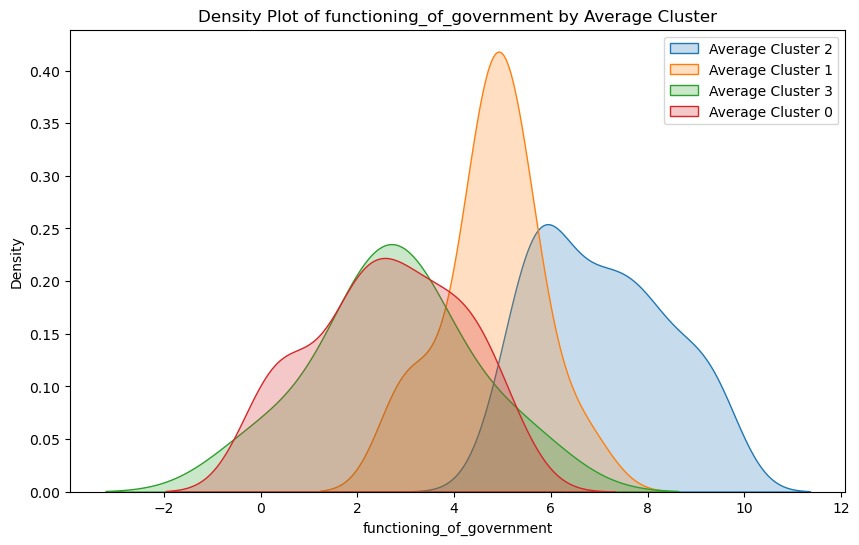

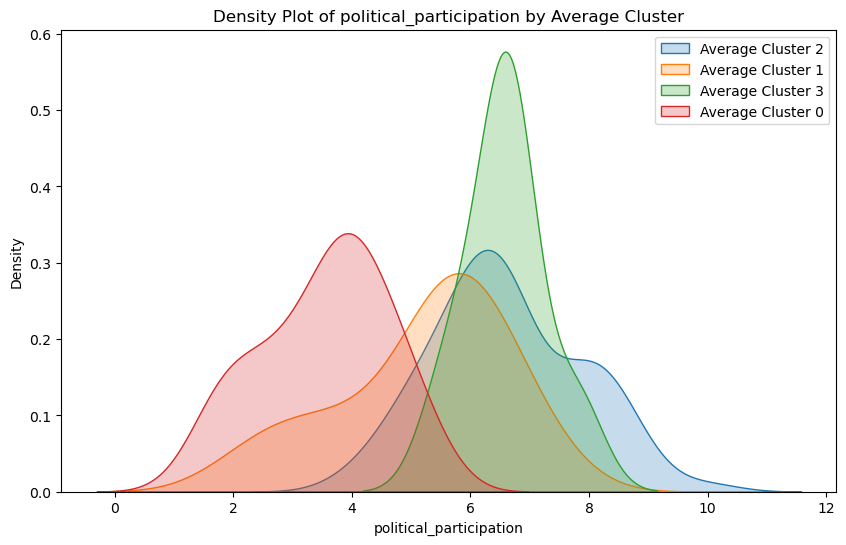

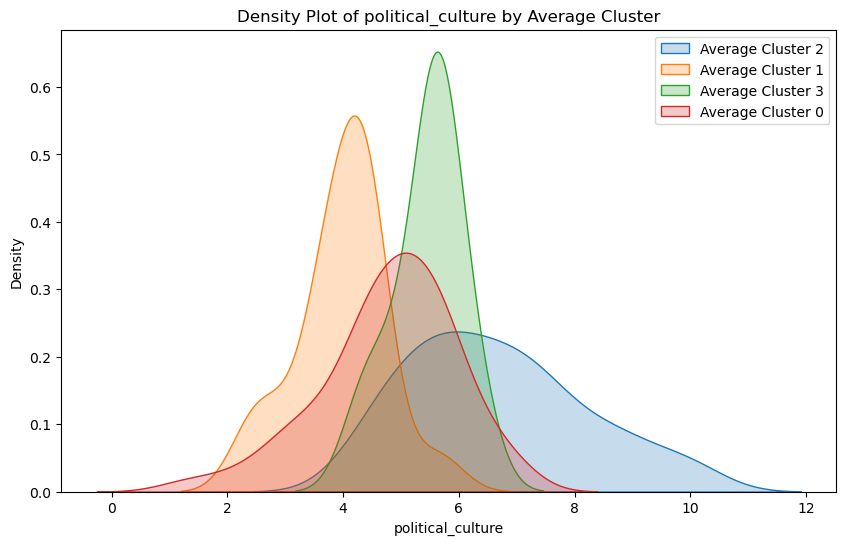

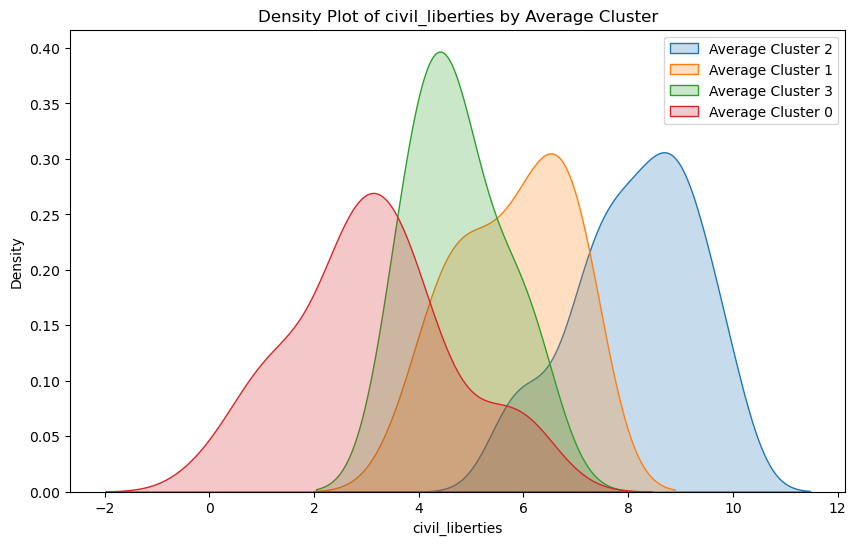

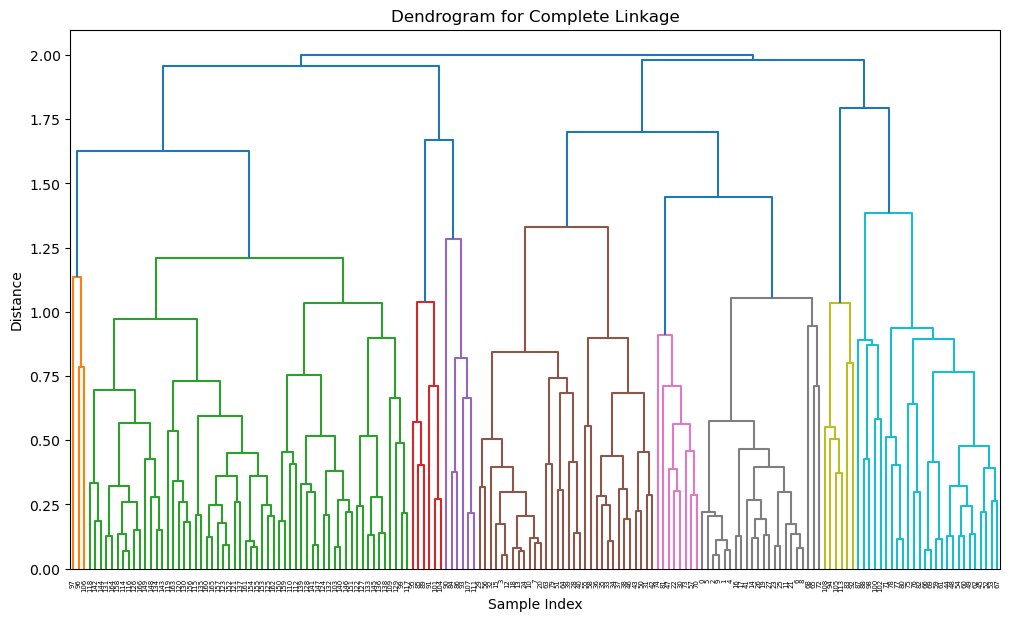

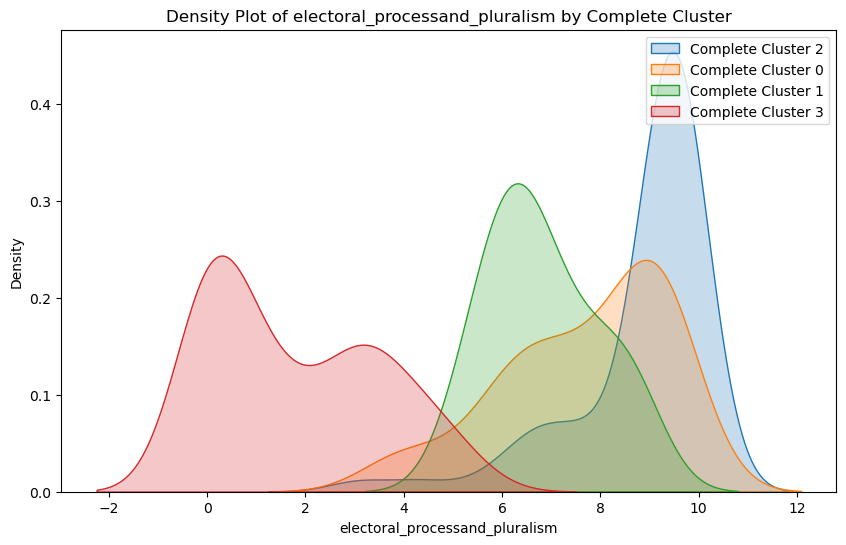

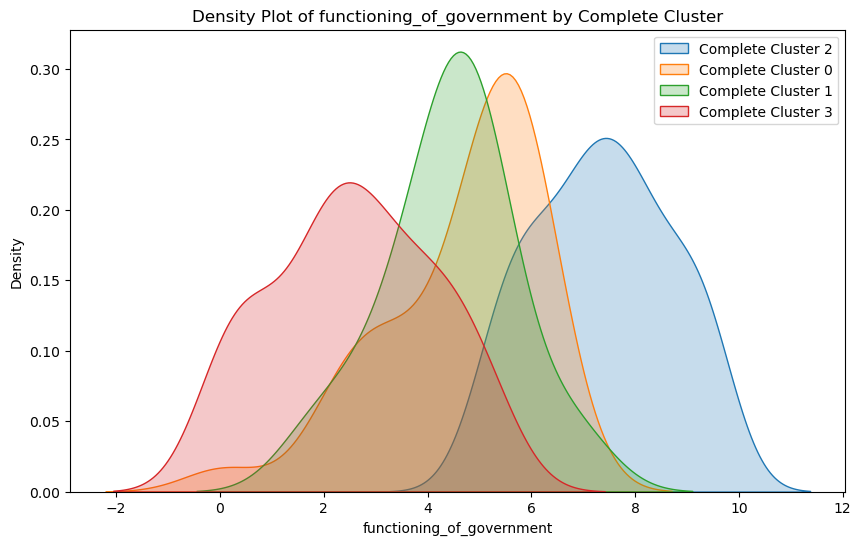

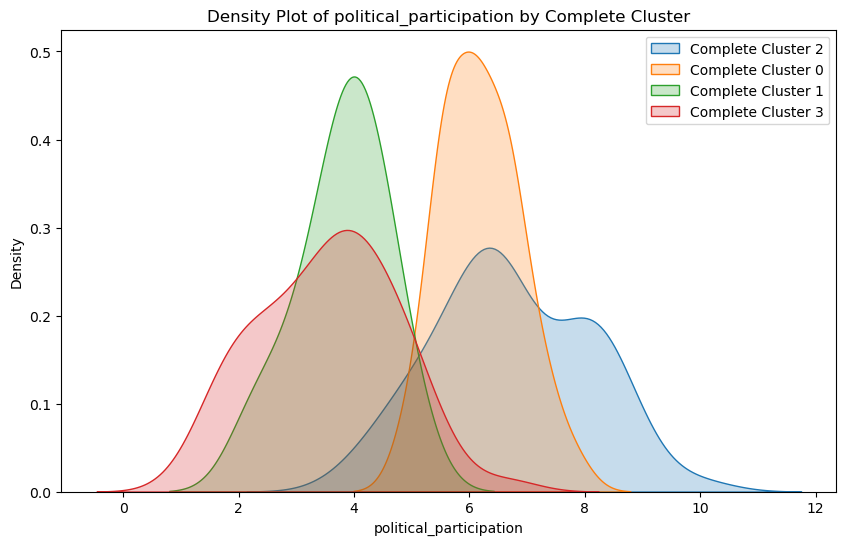

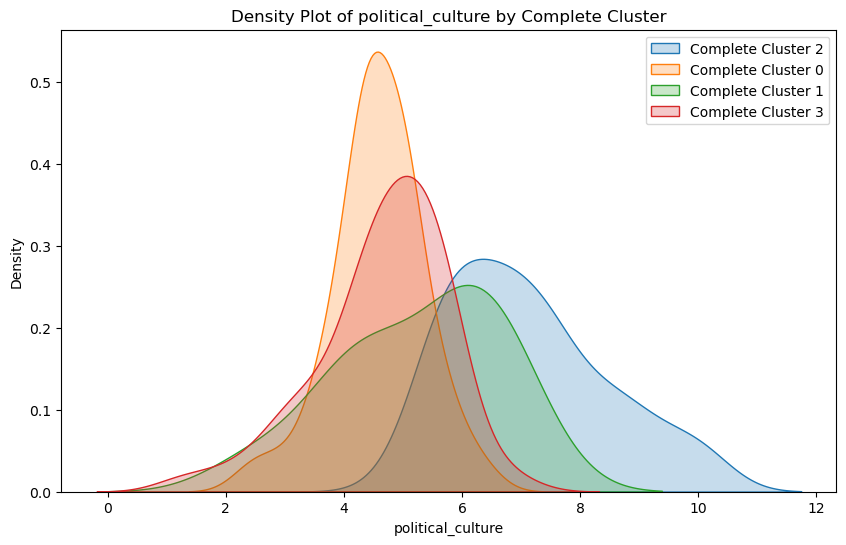

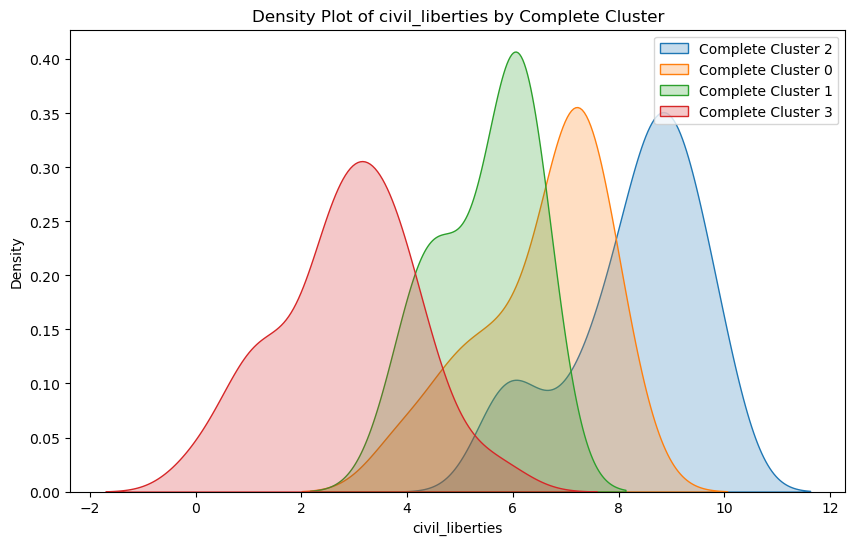

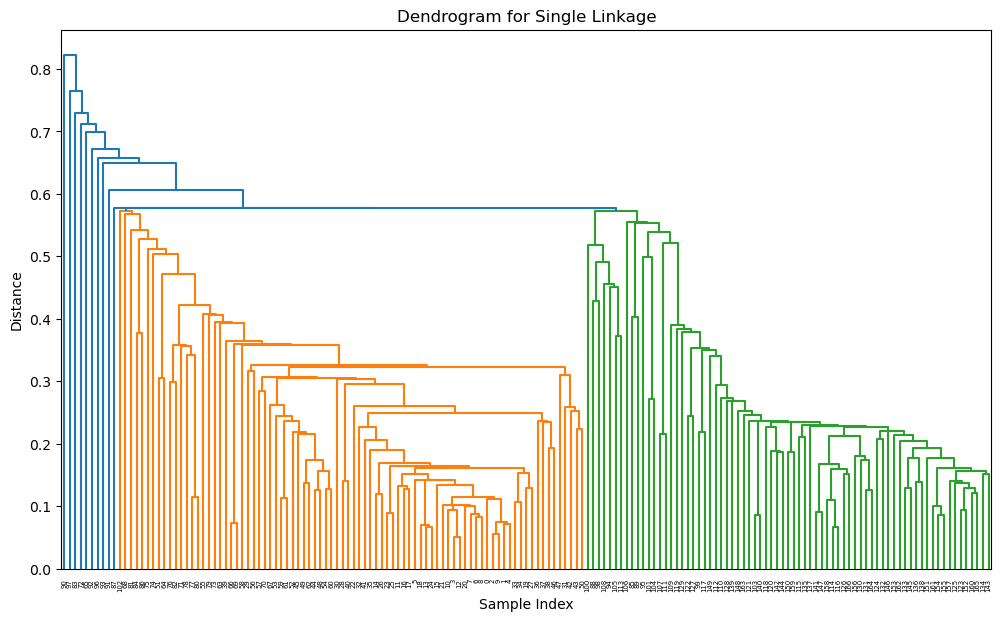

/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/3531139952.py:29: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=f'{method.capitalize()} Cluster {cluster}')
/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/3531139952.py:29: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=f'{method.capitalize()} Cluster {cluster}')
/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/3531139952.py:29: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=f'{method.capitalize()} Cluster {cluster}')


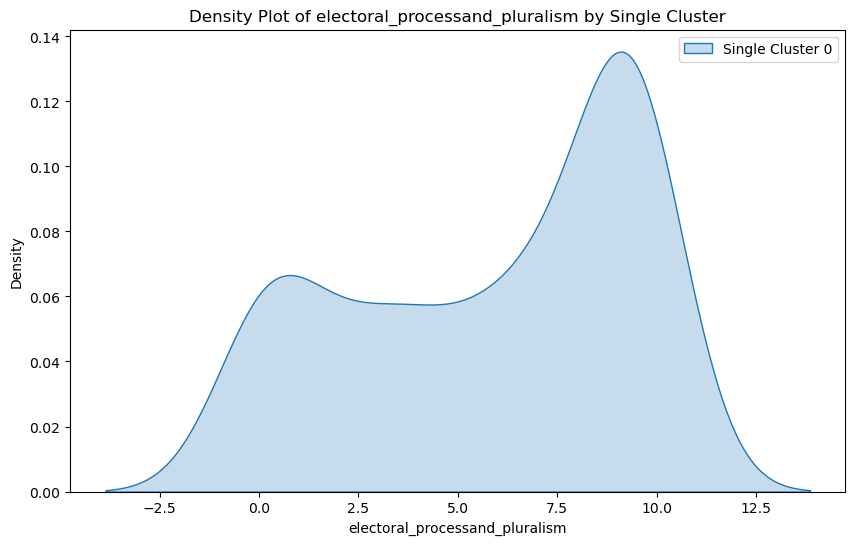

/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/3531139952.py:29: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=f'{method.capitalize()} Cluster {cluster}')
/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/3531139952.py:29: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=f'{method.capitalize()} Cluster {cluster}')
/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/3531139952.py:29: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=f'{method.capitalize()} Cluster {cluster}')


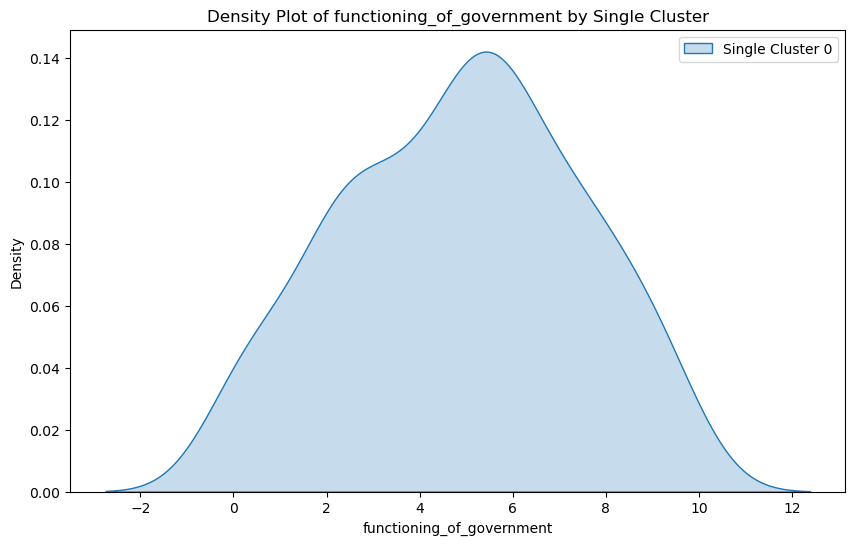

/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/3531139952.py:29: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=f'{method.capitalize()} Cluster {cluster}')
/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/3531139952.py:29: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=f'{method.capitalize()} Cluster {cluster}')
/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/3531139952.py:29: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=f'{method.capitalize()} Cluster {cluster}')


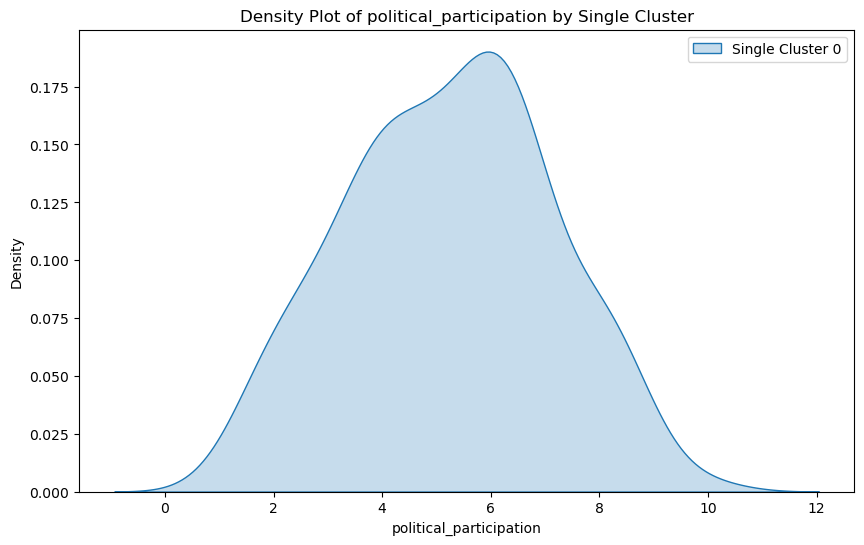

/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/3531139952.py:29: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=f'{method.capitalize()} Cluster {cluster}')
/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/3531139952.py:29: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=f'{method.capitalize()} Cluster {cluster}')
/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/3531139952.py:29: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=f'{method.capitalize()} Cluster {cluster}')


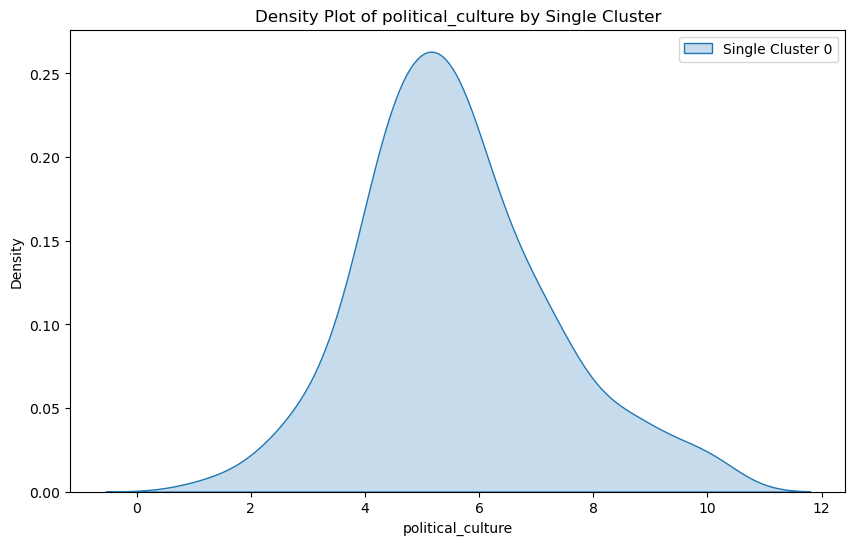

/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/3531139952.py:29: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=f'{method.capitalize()} Cluster {cluster}')
/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/3531139952.py:29: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=f'{method.capitalize()} Cluster {cluster}')
/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/3531139952.py:29: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=f'{method.capitalize()} Cluster {cluster}')


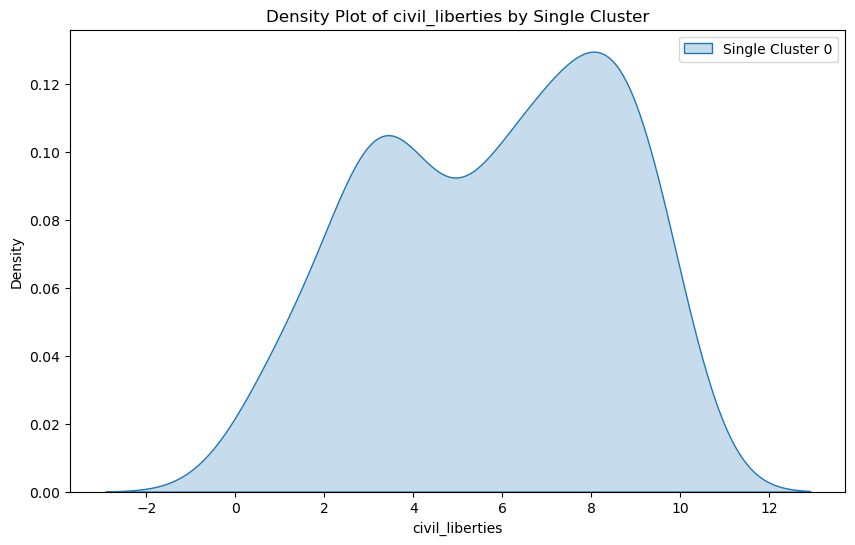

In [13]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

# Define linkage methods to use
linkage_methods = ['ward', 'average', 'complete', 'single']

# Perform Agglomerative Clustering for each linkage method
for method in linkage_methods:
    hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage=method)
    cluster_labels = hc.fit_predict(normalized_criteria)
    df_cleaned[method + '_Cluster'] = cluster_labels

    # Generate linkage matrix and plot dendrogram
    Z = linkage(normalized_criteria, method=method)
    plt.figure(figsize=(12, 7))
    dendrogram(Z)
    plt.title(f'Dendrogram for {method.capitalize()} Linkage')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

    # Plot density plots for each criterion by cluster
    for criterion in criteria_columns:
        plt.figure(figsize=(10, 6))
        for cluster in df_cleaned[method + '_Cluster'].unique():
            subset = df_cleaned[df_cleaned[method + '_Cluster'] == cluster]
            sns.kdeplot(subset[criterion], fill=True, label=f'{method.capitalize()} Cluster {cluster}')
        plt.title(f'Density Plot of {criterion} by {method.capitalize()} Cluster')
        plt.xlabel(criterion)
        plt.ylabel('Density')
        plt.legend()
        plt.show()

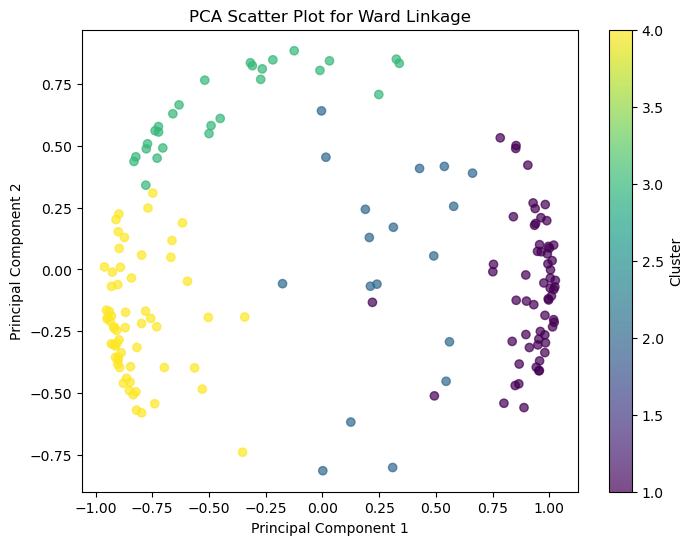

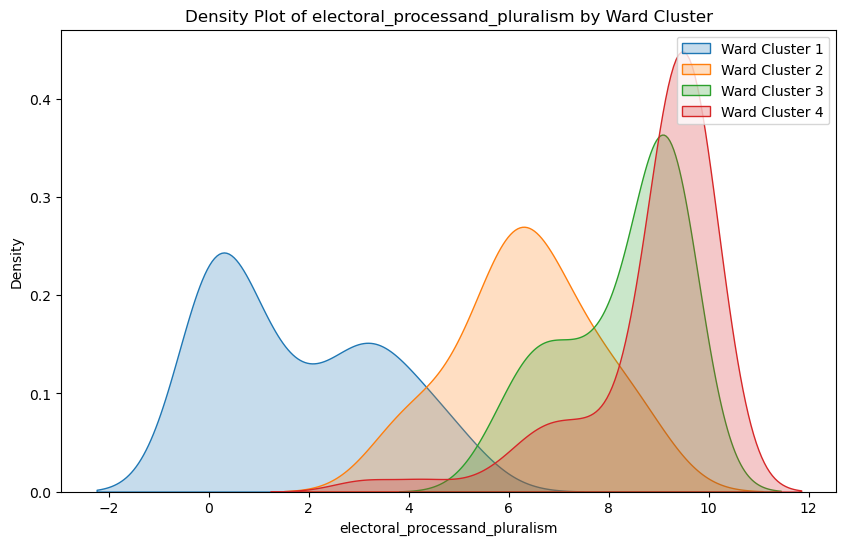

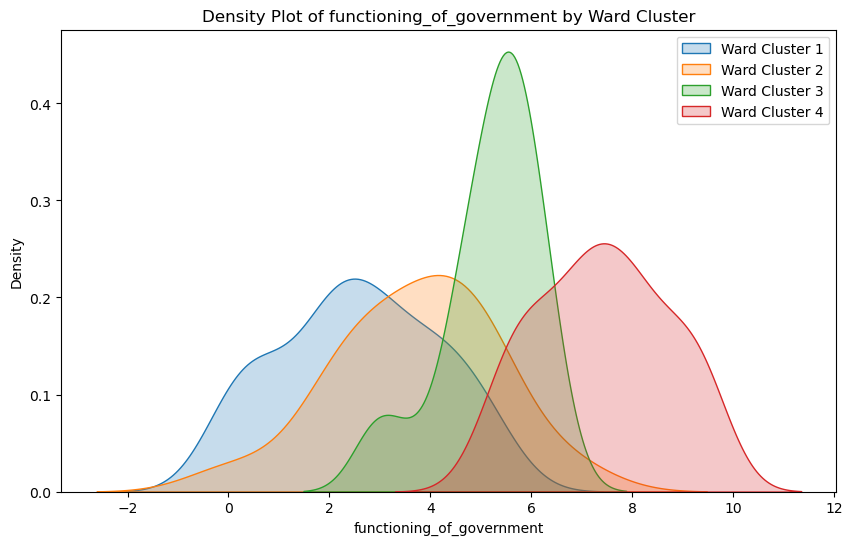

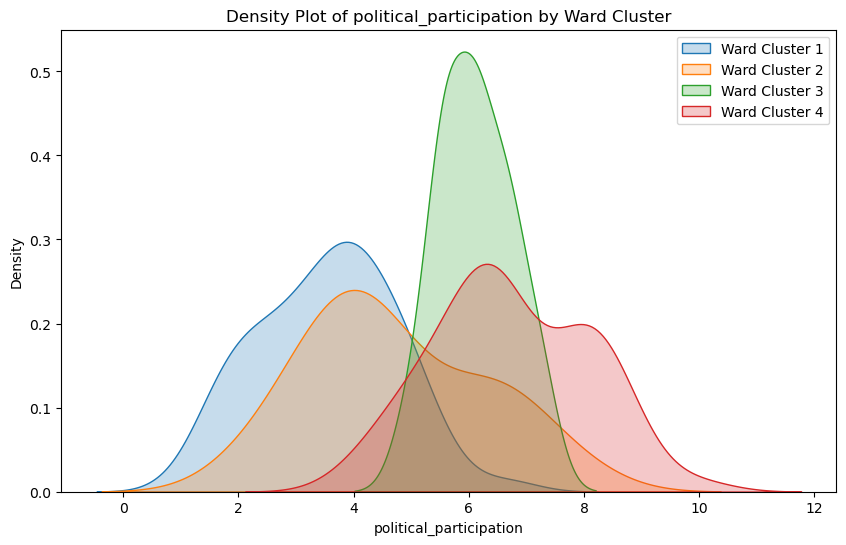

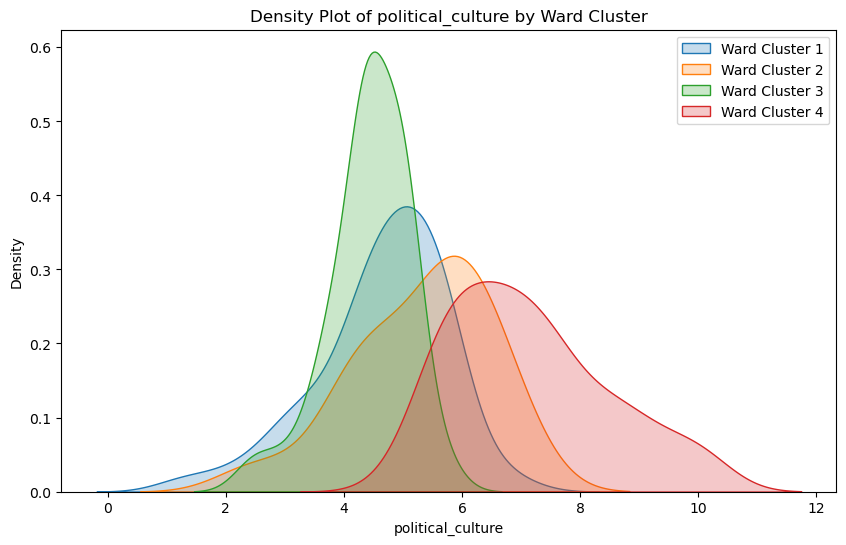

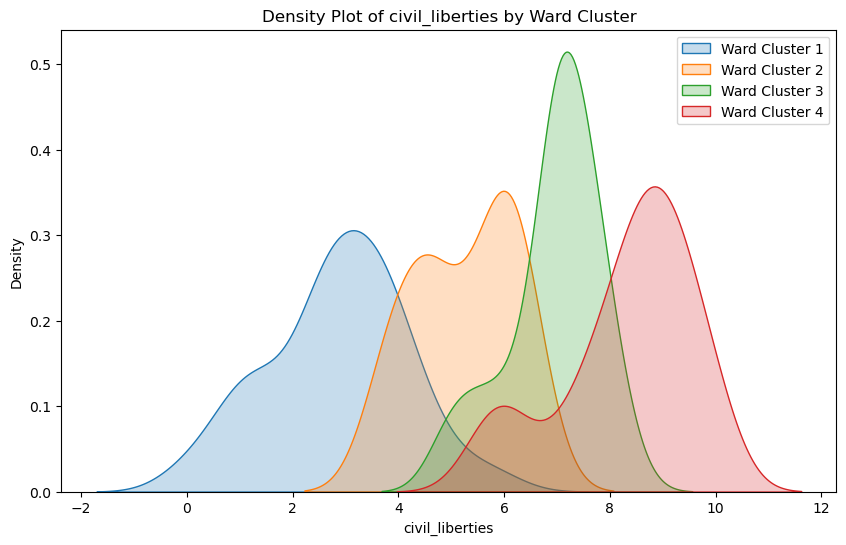

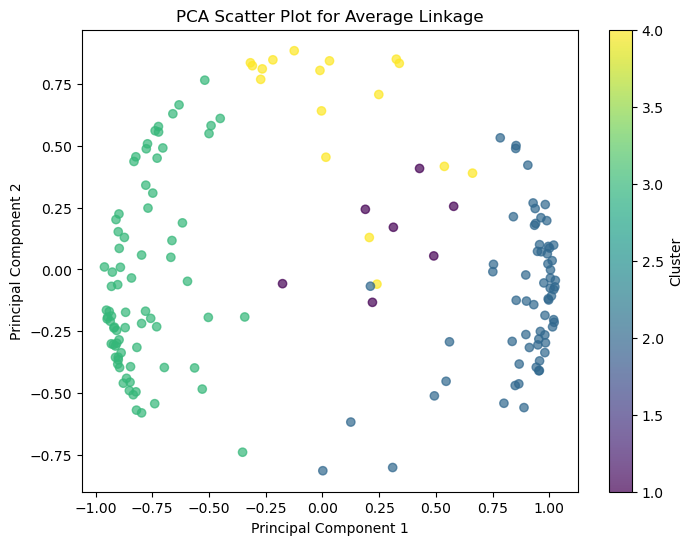

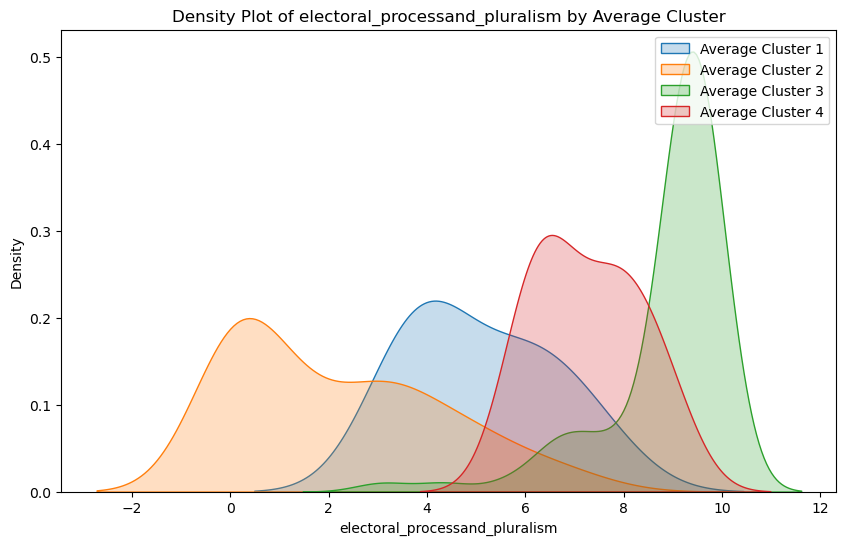

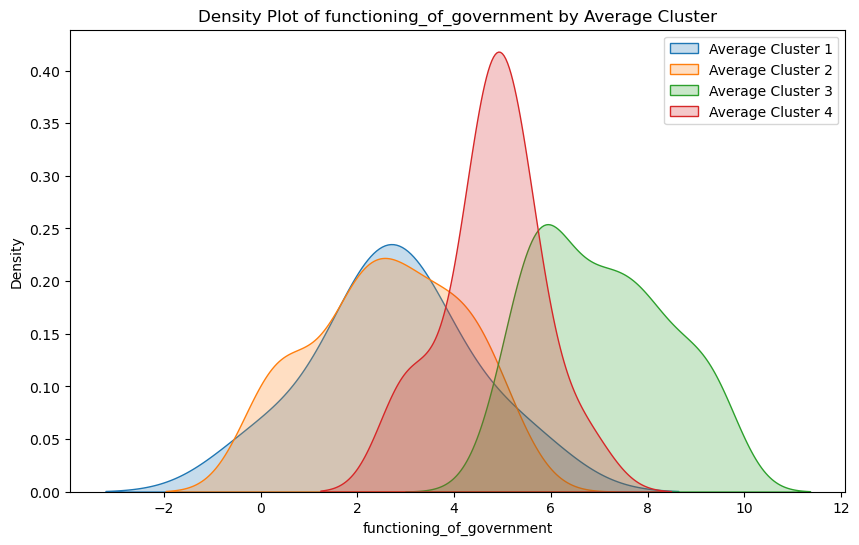

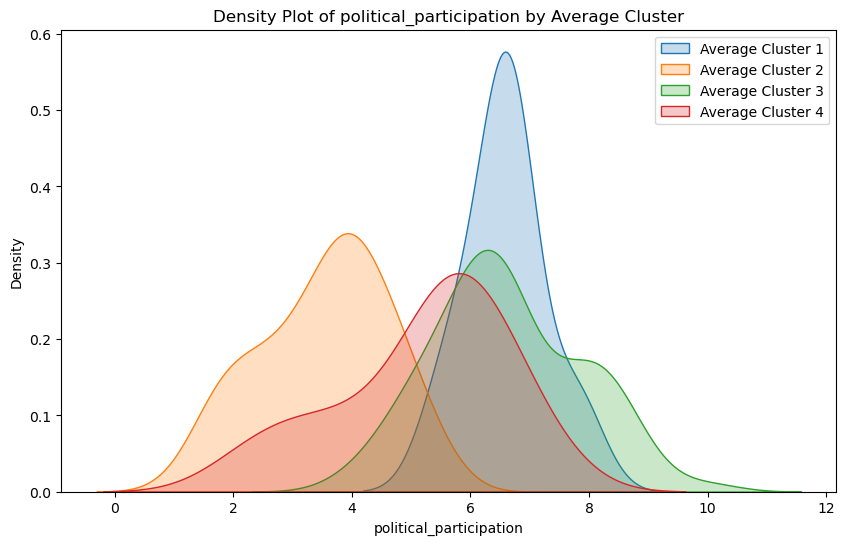

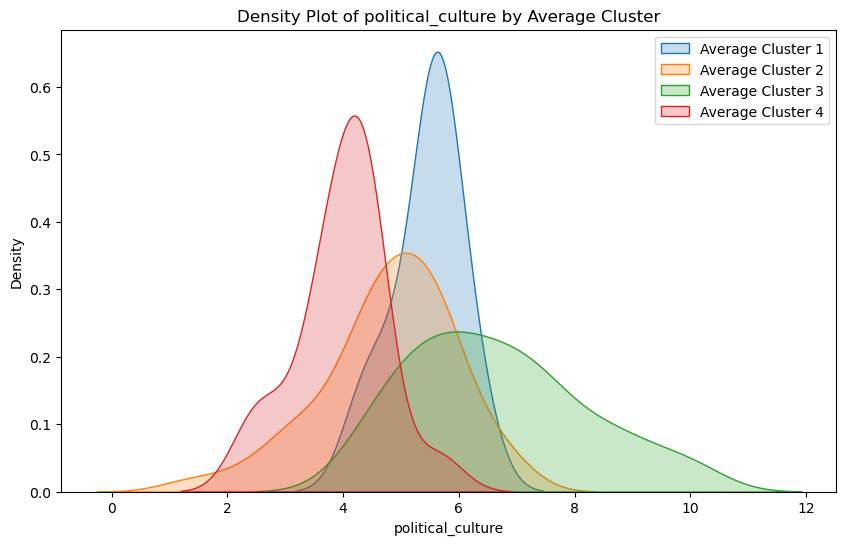

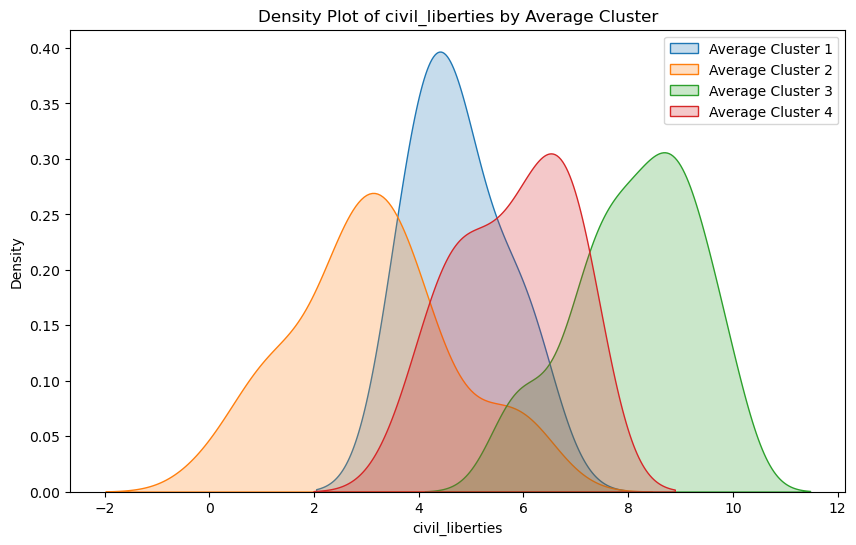

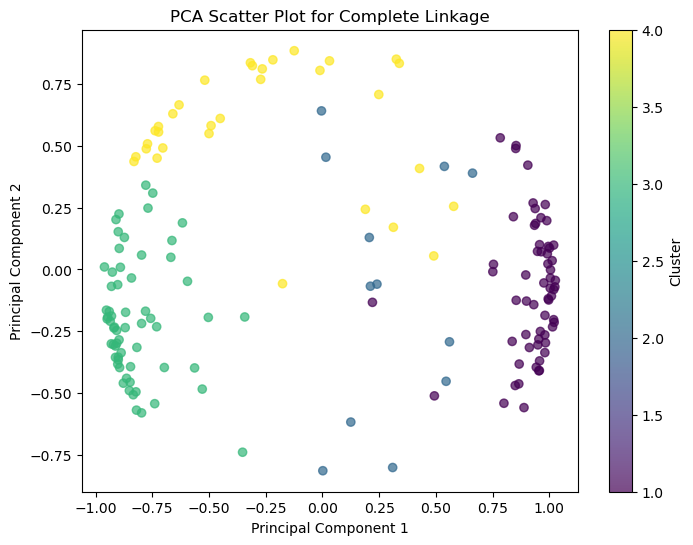

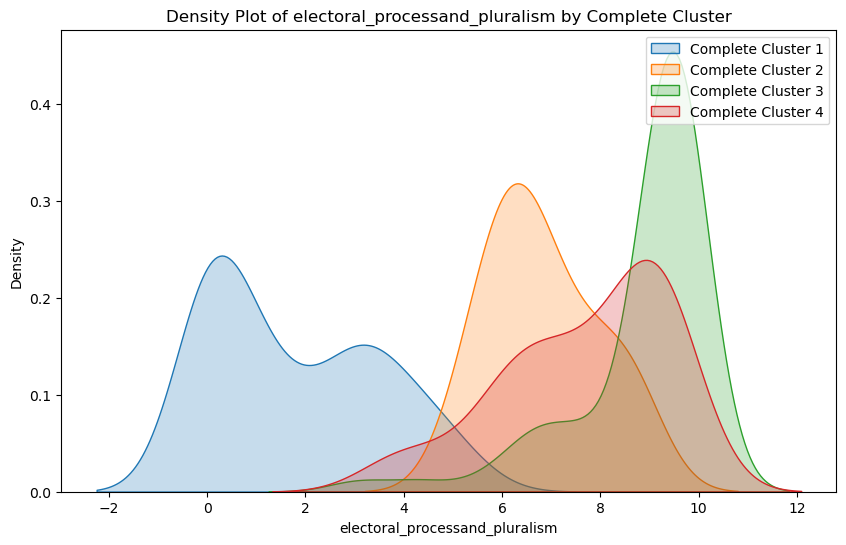

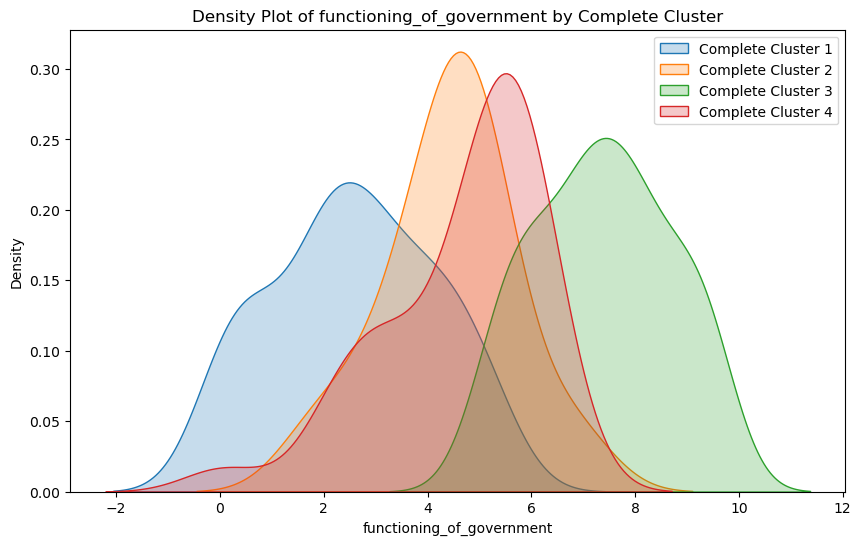

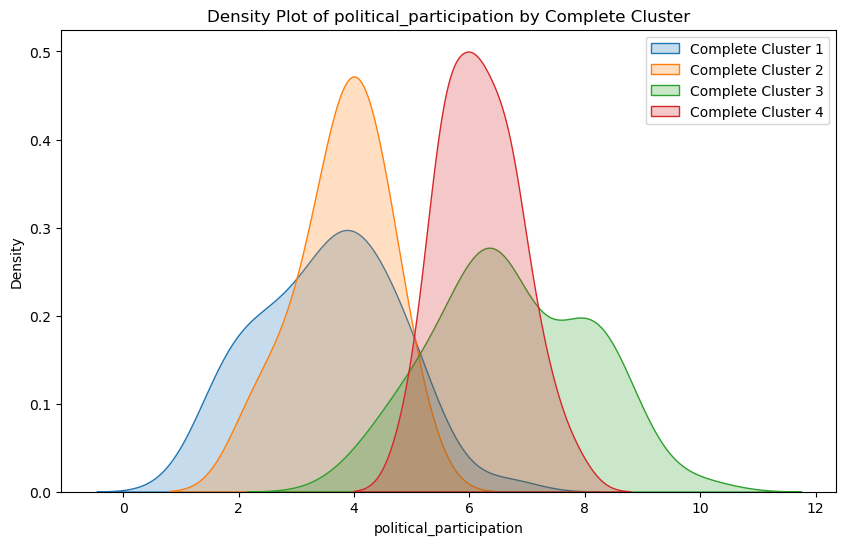

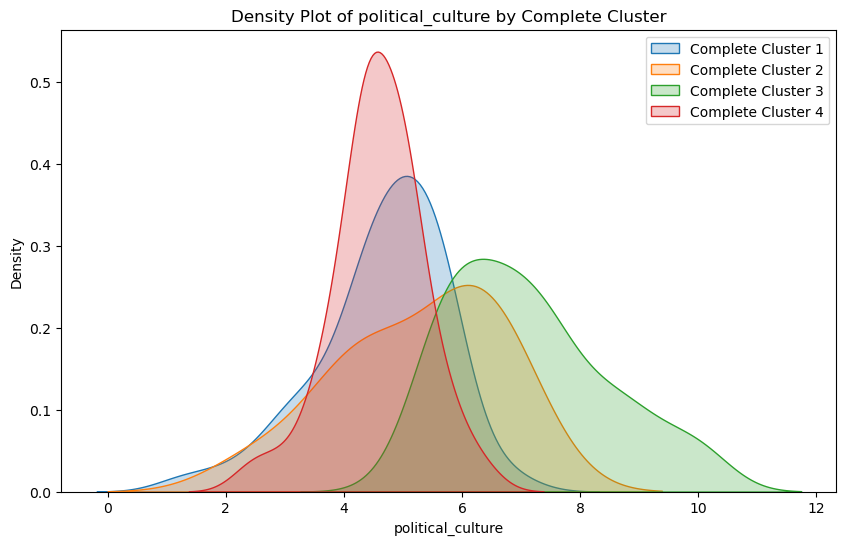

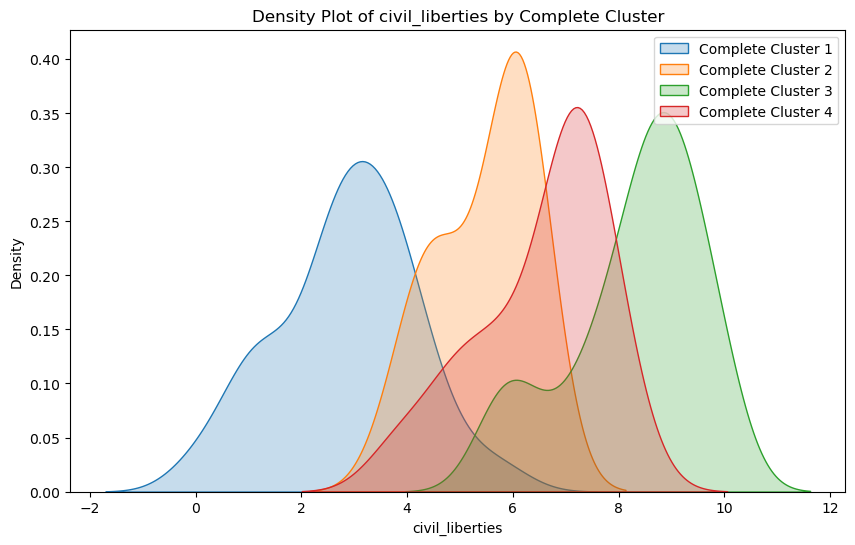

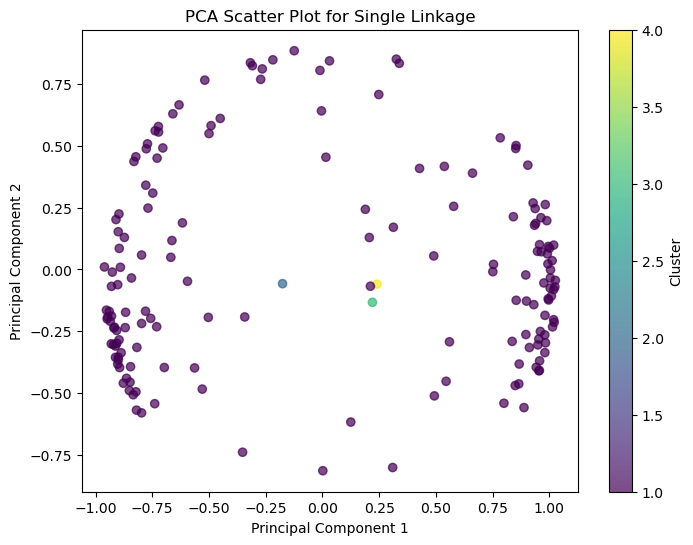

/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/2024426489.py:32: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=f'{method.capitalize()} Cluster {cluster}')
/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/2024426489.py:32: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=f'{method.capitalize()} Cluster {cluster}')
/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/2024426489.py:32: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=f'{method.capitalize()} Cluster {cluster}')


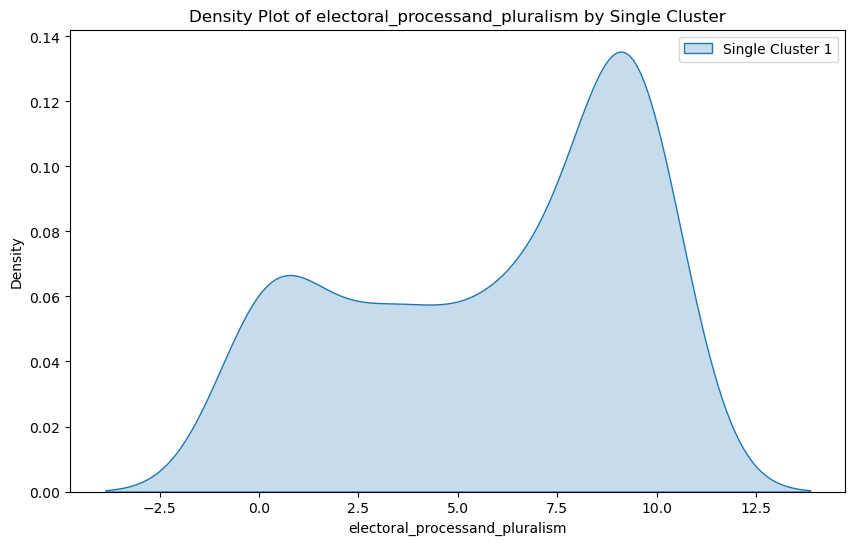

/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/2024426489.py:32: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=f'{method.capitalize()} Cluster {cluster}')
/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/2024426489.py:32: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=f'{method.capitalize()} Cluster {cluster}')
/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/2024426489.py:32: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=f'{method.capitalize()} Cluster {cluster}')


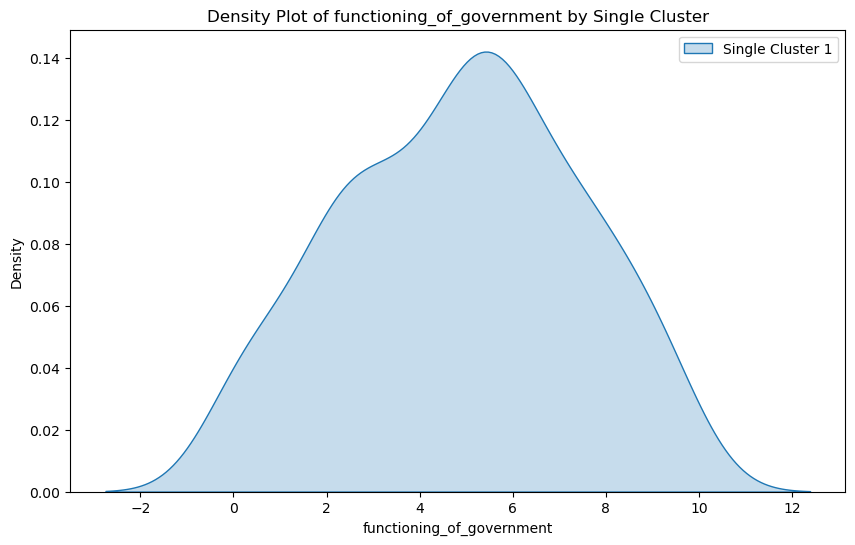

/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/2024426489.py:32: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=f'{method.capitalize()} Cluster {cluster}')
/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/2024426489.py:32: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=f'{method.capitalize()} Cluster {cluster}')
/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/2024426489.py:32: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=f'{method.capitalize()} Cluster {cluster}')


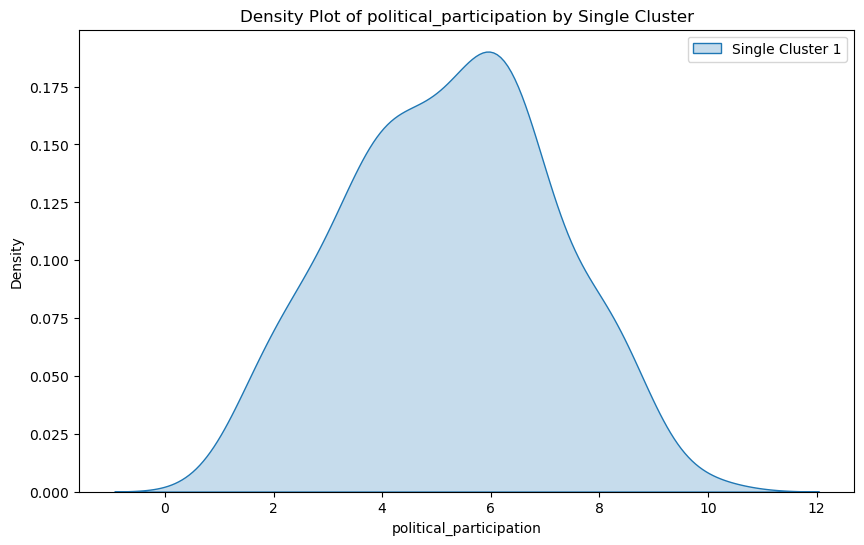

/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/2024426489.py:32: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=f'{method.capitalize()} Cluster {cluster}')
/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/2024426489.py:32: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=f'{method.capitalize()} Cluster {cluster}')
/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/2024426489.py:32: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=f'{method.capitalize()} Cluster {cluster}')


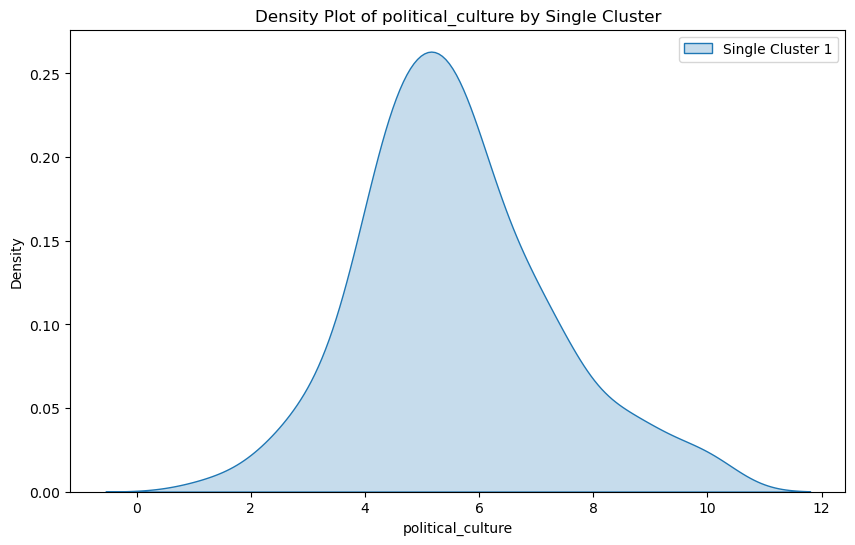

/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/2024426489.py:32: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=f'{method.capitalize()} Cluster {cluster}')
/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/2024426489.py:32: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=f'{method.capitalize()} Cluster {cluster}')
/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/2024426489.py:32: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=f'{method.capitalize()} Cluster {cluster}')


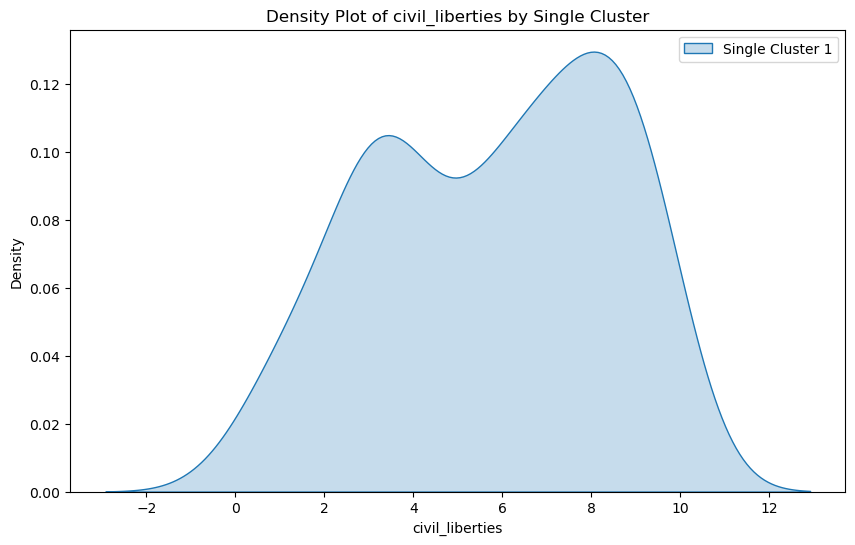

In [12]:
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import fcluster

# Number of clusters to form
n_clusters = 4

# Perform dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(normalized_criteria)

for method in linkage_methods:
    # Compute the linkage matrix
    Z = linkage(normalized_criteria, method=method)
    
    # Determine cluster labels
    cluster_labels = fcluster(Z, t=n_clusters, criterion='maxclust')
    
    # Scatter plot of the PCA-reduced data, colored by cluster labels
    plt.figure(figsize=(8, 6))
    plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='viridis', marker='o', alpha=0.7)
    plt.title(f'PCA Scatter Plot for {method.capitalize()} Linkage')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster')
    plt.show()
    
    # Density plots for each criterion by cluster
    for criterion in criteria_columns:
        plt.figure(figsize=(10, 6))
        for cluster in set(cluster_labels):
            subset = df_cleaned.iloc[cluster_labels == cluster]
            sns.kdeplot(subset[criterion], fill=True, label=f'{method.capitalize()} Cluster {cluster}')
        plt.title(f'Density Plot of {criterion} by {method.capitalize()} Cluster')
        plt.xlabel(criterion)
        plt.ylabel('Density')
        plt.legend()
        plt.show()


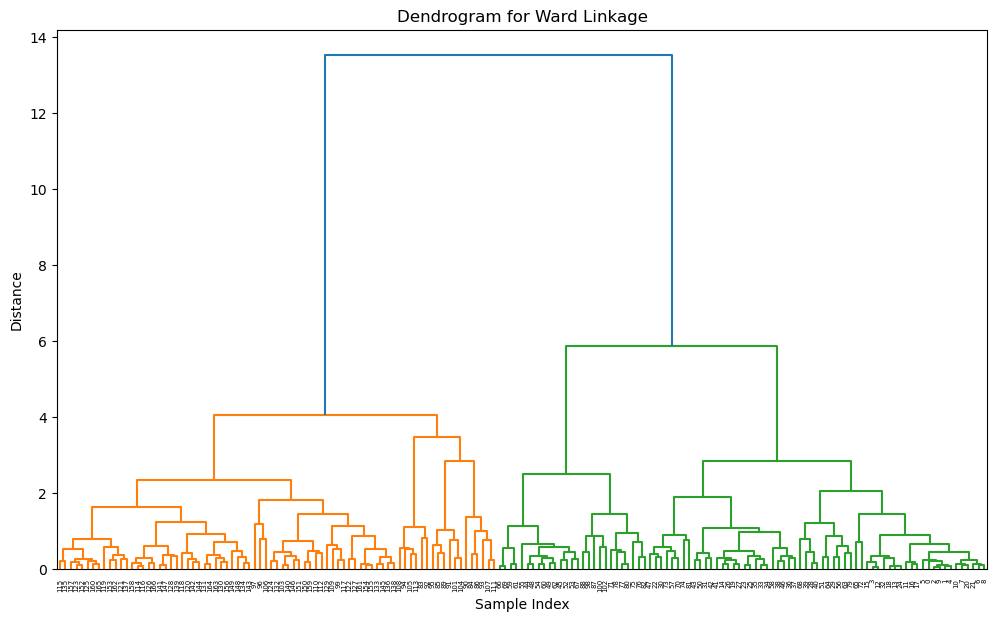

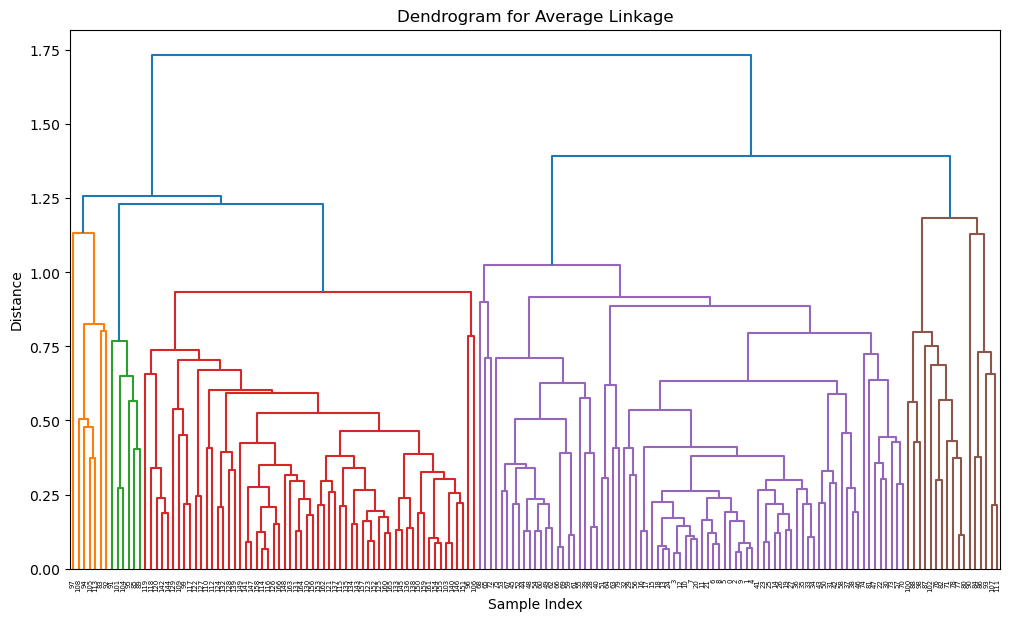

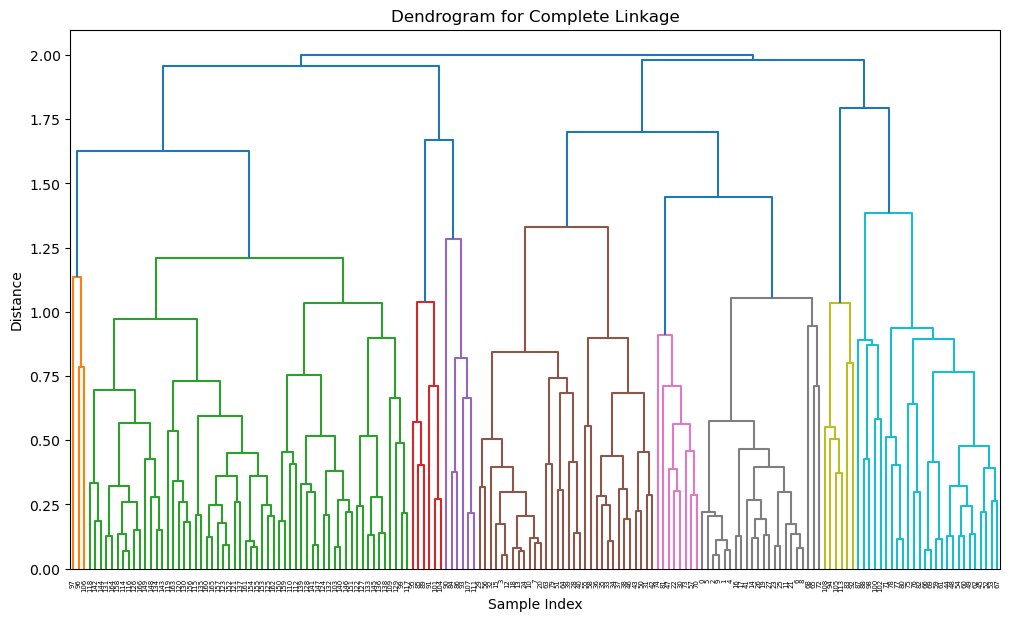

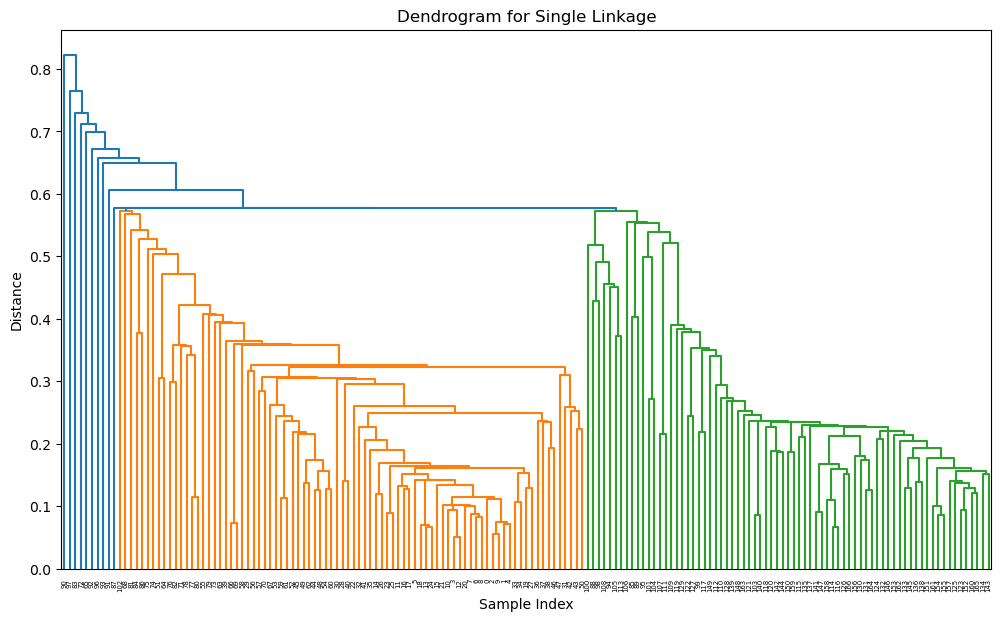

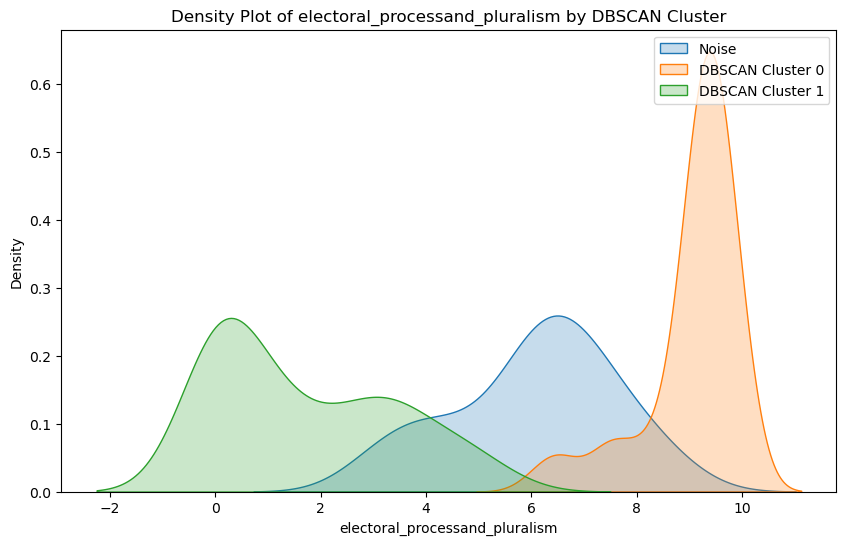

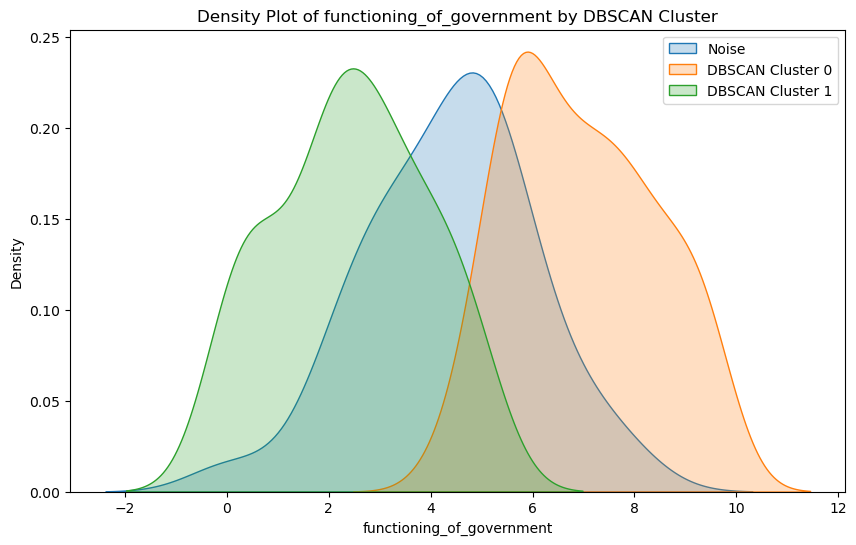

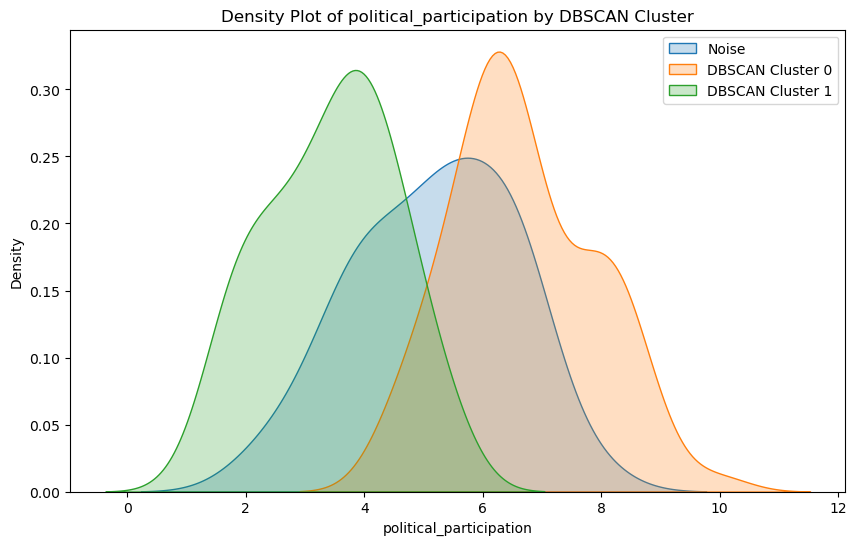

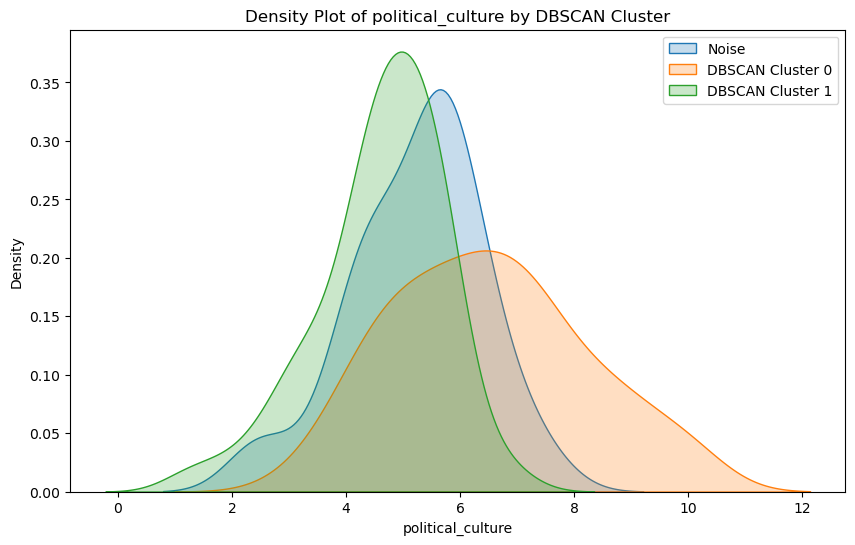

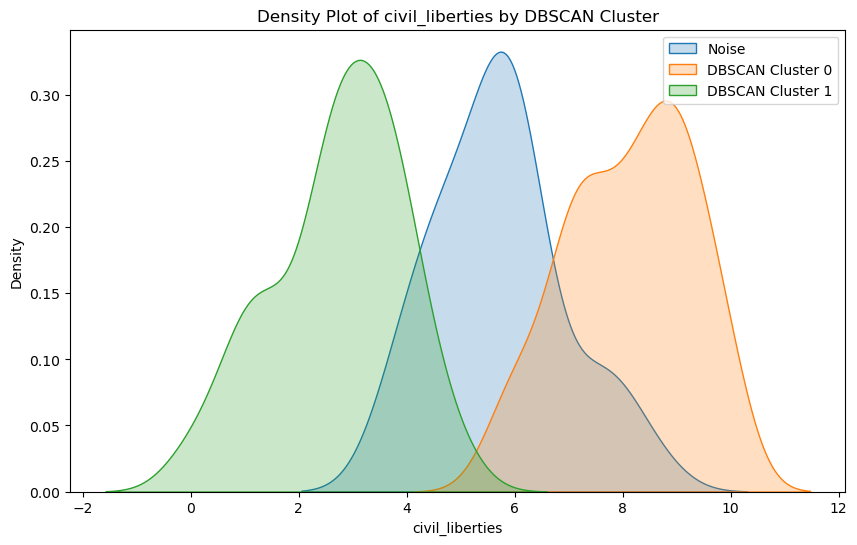

In [15]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'normalized_criteria' is your dataset and 'criteria_columns' contains the column names of interest

# Define linkage methods to use for Agglomerative Clustering
linkage_methods = ['ward', 'average', 'complete', 'single']

# Perform Agglomerative Clustering for each linkage method and plot dendrograms
for method in linkage_methods:
    hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage=method)
    cluster_labels = hc.fit_predict(normalized_criteria)
    df_cleaned[method + '_Cluster'] = cluster_labels

    # Generate linkage matrix and plot dendrogram
    Z = linkage(normalized_criteria, method=method)
    plt.figure(figsize=(12, 7))
    dendrogram(Z)
    plt.title(f'Dendrogram for {method.capitalize()} Linkage')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

# Parameters for DBSCAN
eps = 0.5  # Example value, adjust based on your data
min_samples = 5  # Example value, adjust based on your data

# Apply DBSCAN for density plots
db = DBSCAN(eps=eps, min_samples=min_samples).fit(normalized_criteria)
db_labels = db.labels_
df_cleaned['DBSCAN_Cluster'] = db_labels

# Plot density plots for each criterion by DBSCAN cluster
for criterion in criteria_columns:
    plt.figure(figsize=(10, 6))
    for cluster in np.unique(db_labels):
        subset = df_cleaned[df_cleaned['DBSCAN_Cluster'] == cluster]
        # Handle noise if needed
        label = f'DBSCAN Cluster {cluster}' if cluster != -1 else 'Noise'
        sns.kdeplot(subset[criterion], fill=True, label=label)
    plt.title(f'Density Plot of {criterion} by DBSCAN Cluster')
    plt.xlabel(criterion)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


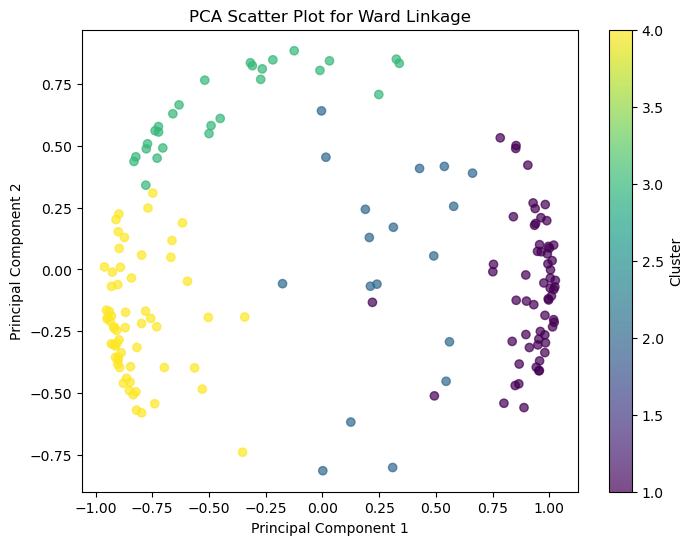

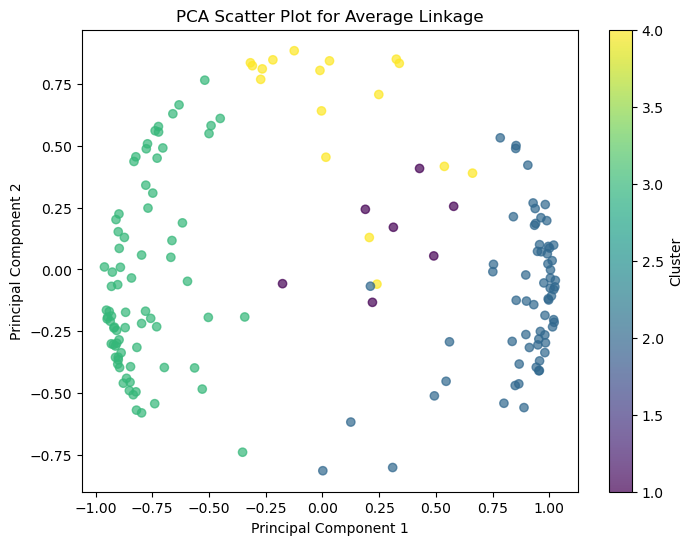

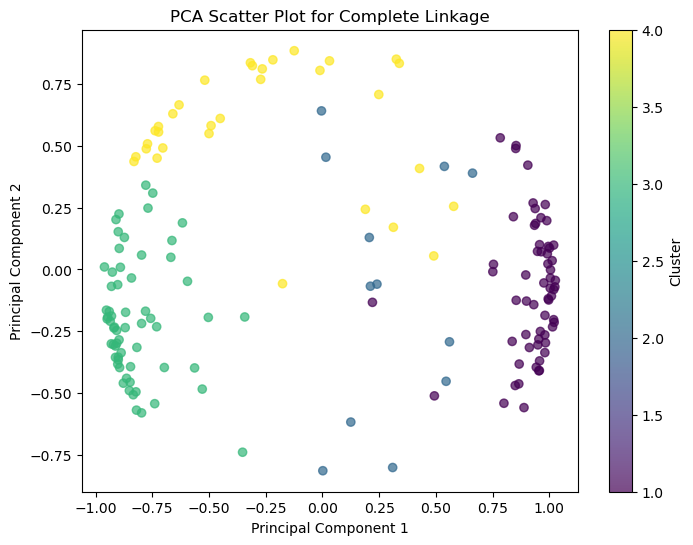

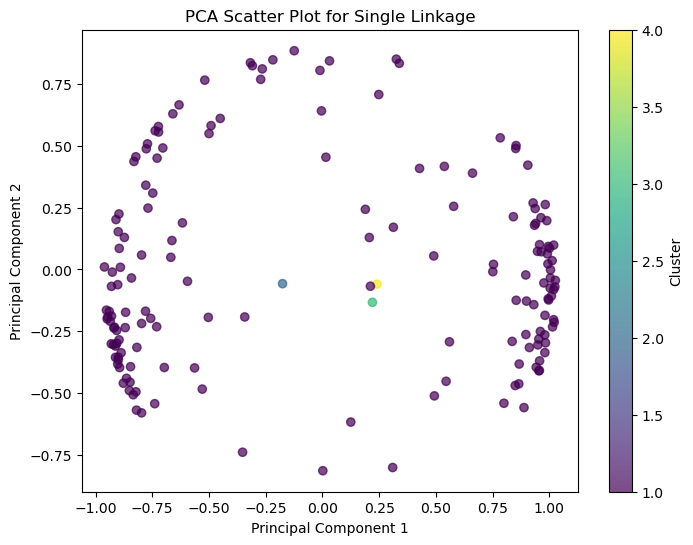

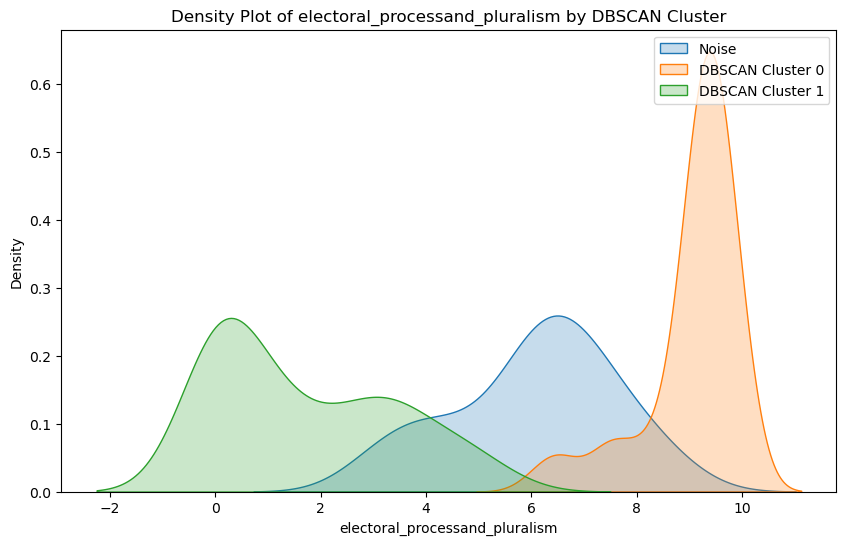

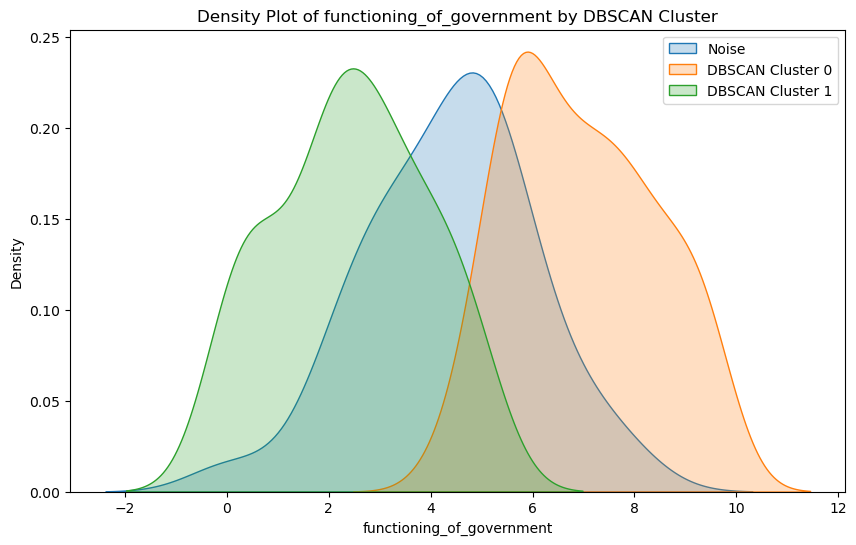

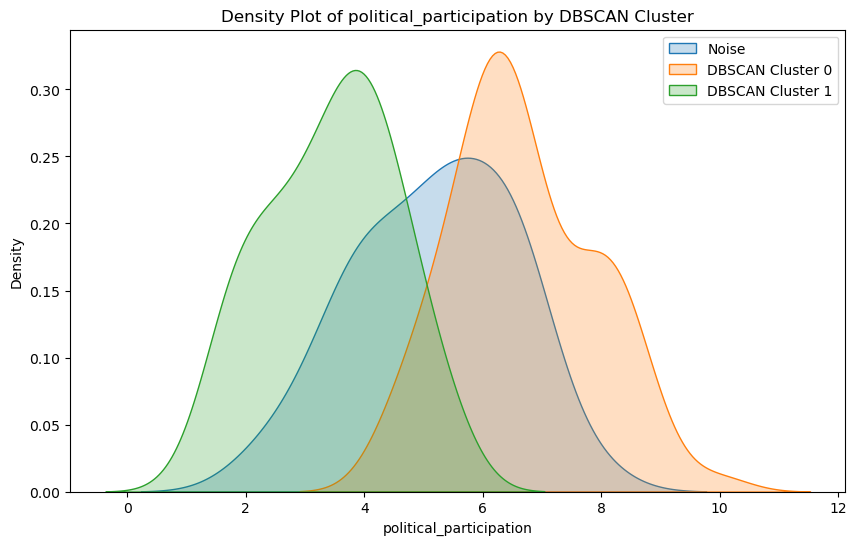

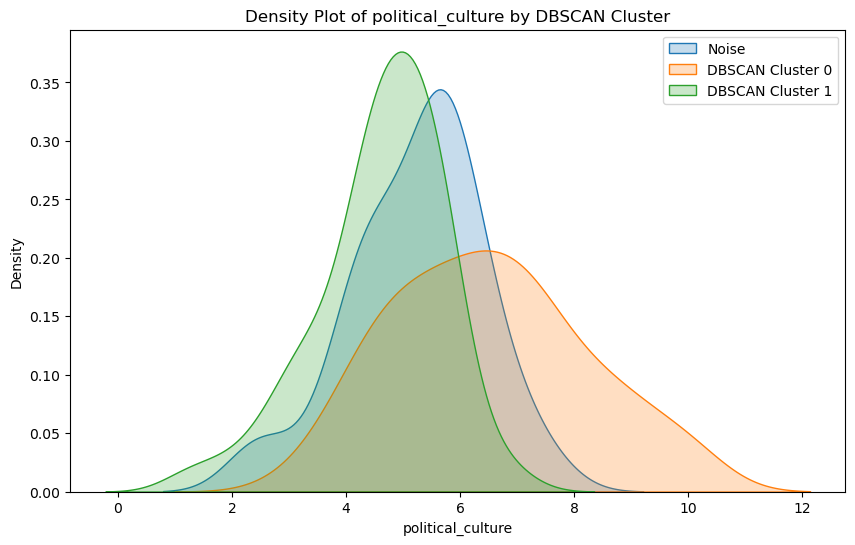

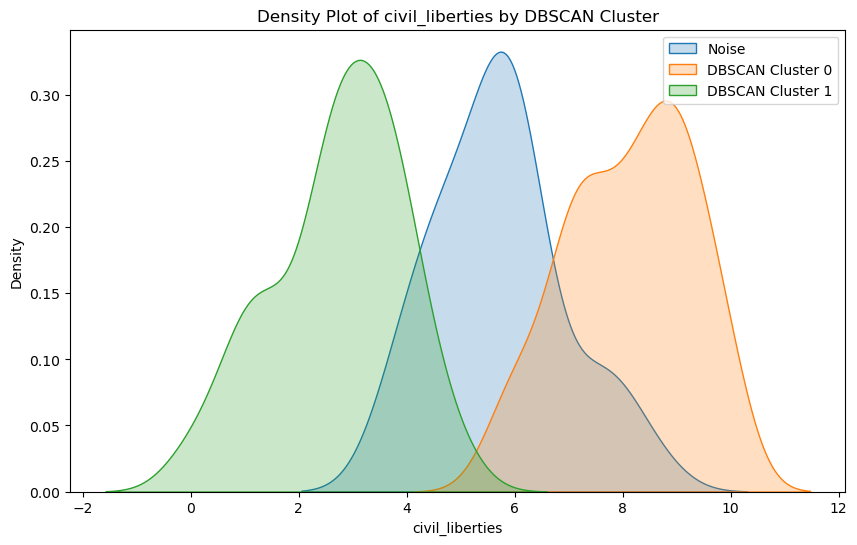

In [16]:
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import fcluster, linkage
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'normalized_criteria' is your dataset and 'criteria_columns' contains the column names of interest

# Number of clusters to form is used for hierarchical clustering
n_clusters = 4

# Perform dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(normalized_criteria)

# Hierarchical clustering and PCA scatter plots
for method in linkage_methods:
    # Compute the linkage matrix
    Z = linkage(normalized_criteria, method=method)
    
    # Determine cluster labels
    cluster_labels = fcluster(Z, t=n_clusters, criterion='maxclust')
    
    # Scatter plot of the PCA-reduced data, colored by cluster labels
    plt.figure(figsize=(8, 6))
    plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='viridis', marker='o', alpha=0.7)
    plt.title(f'PCA Scatter Plot for {method.capitalize()} Linkage')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster')
    plt.show()

# DBSCAN parameters
eps = 0.5  # Example value, adjust based on your data
min_samples = 5  # Example value, adjust based on your data

# Apply DBSCAN for density plots
db = DBSCAN(eps=eps, min_samples=min_samples).fit(normalized_criteria)
db_labels = db.labels_
df_cleaned['DBSCAN_Cluster'] = db_labels

# Plot density plots for each criterion by DBSCAN cluster
for criterion in criteria_columns:
    plt.figure(figsize=(10, 6))
    for cluster in np.unique(db_labels):
        subset = df_cleaned[df_cleaned['DBSCAN_Cluster'] == cluster]
        # Handle noise if needed
        label = f'DBSCAN Cluster {cluster}' if cluster != -1 else 'Noise'
        sns.kdeplot(subset[criterion], fill=True, label=label)
    plt.title(f'Density Plot of {criterion} by DBSCAN Cluster')
    plt.xlabel(criterion)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


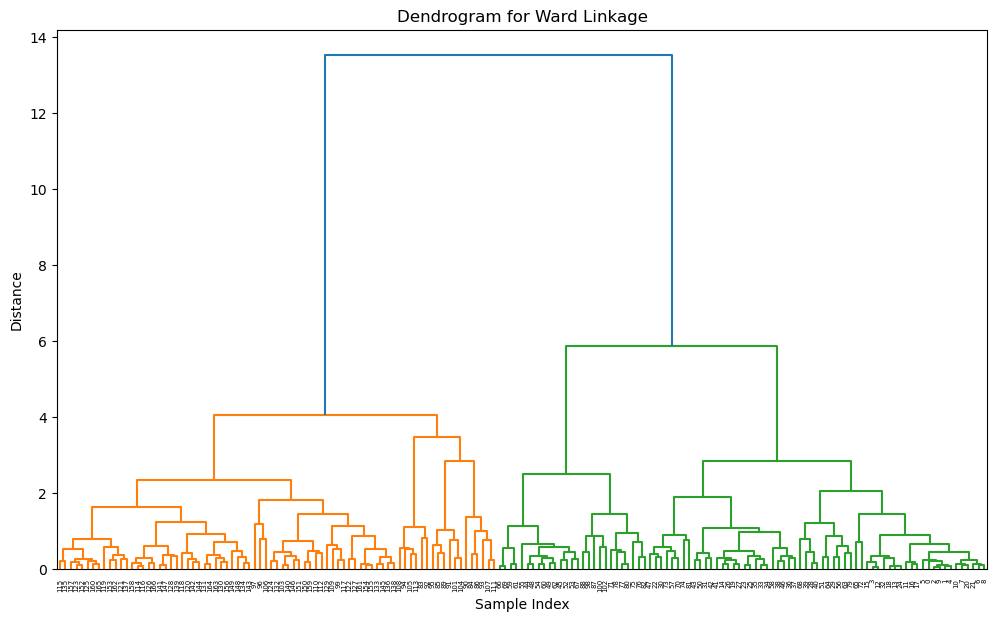

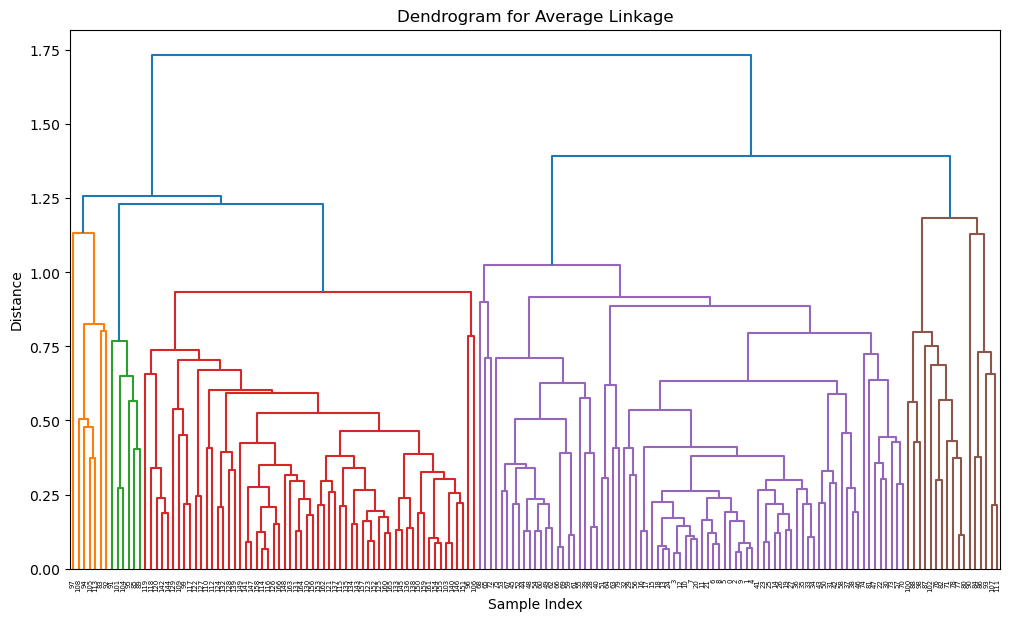

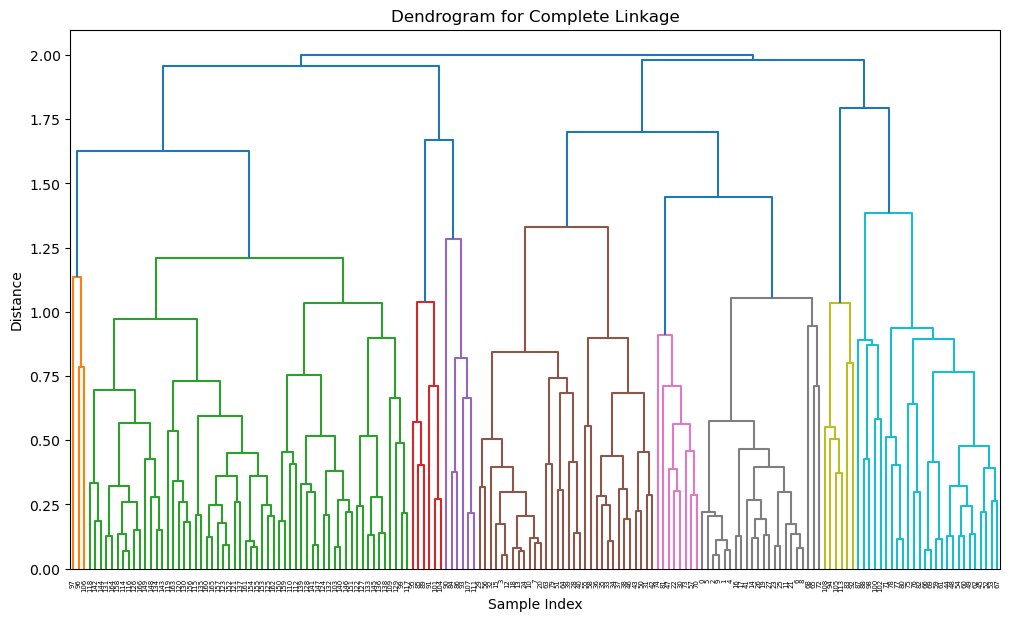

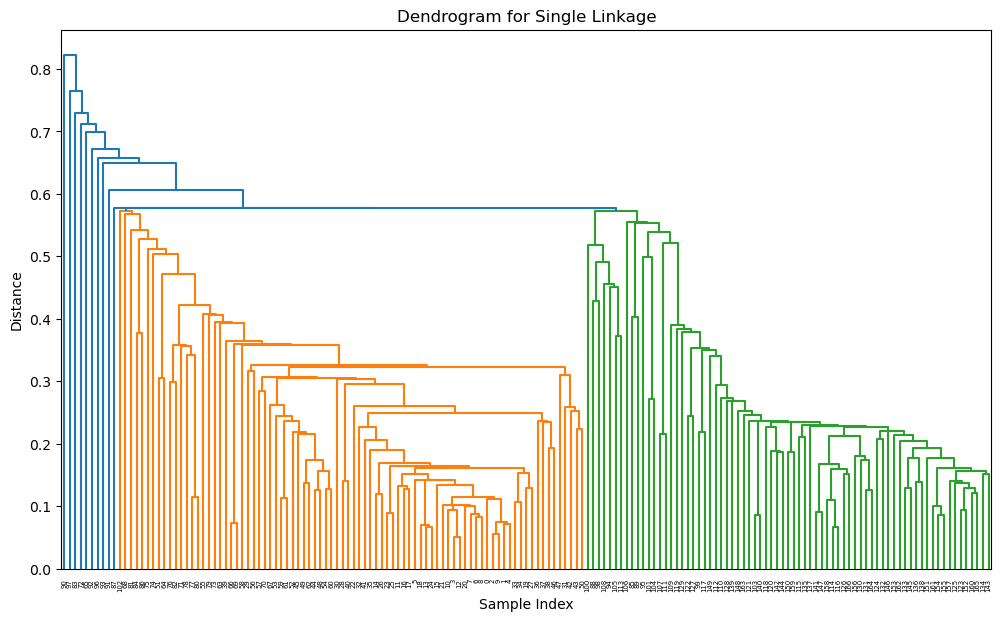

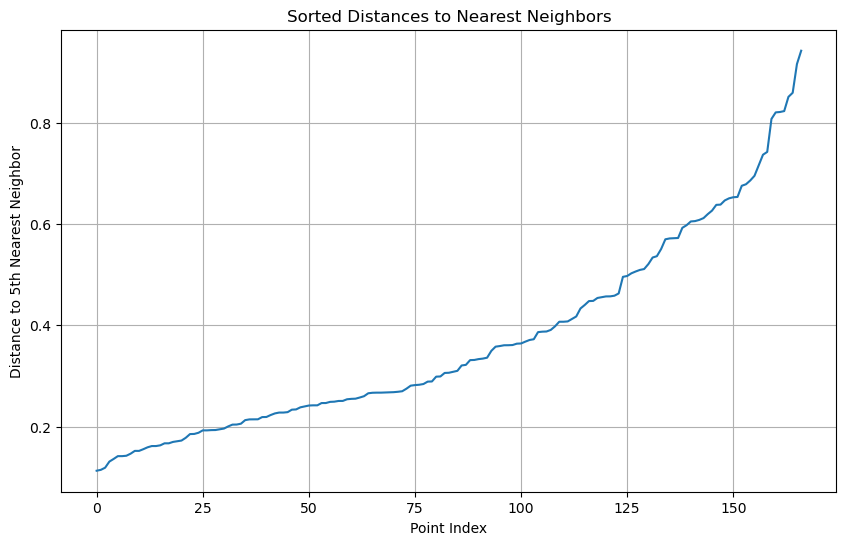

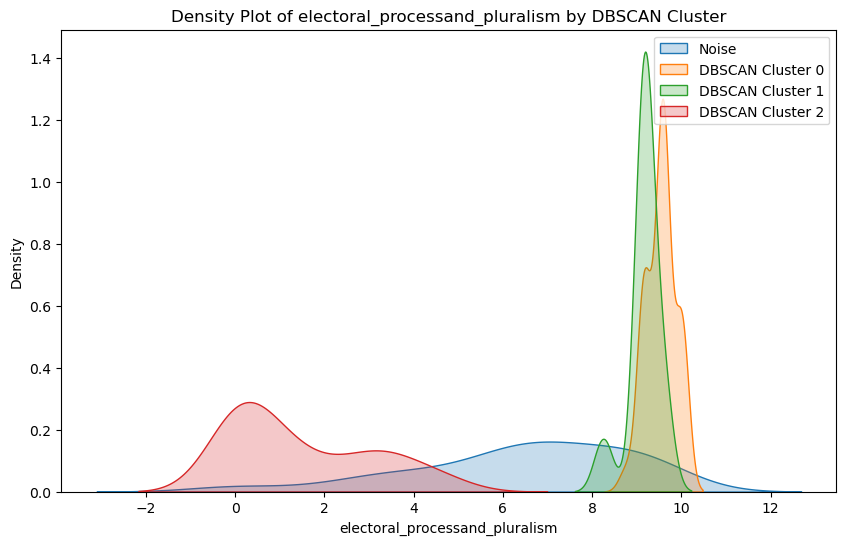

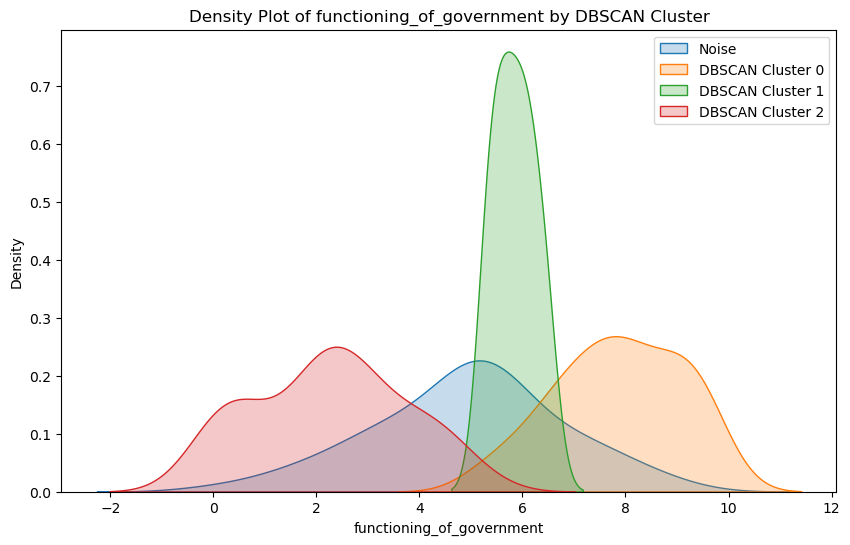

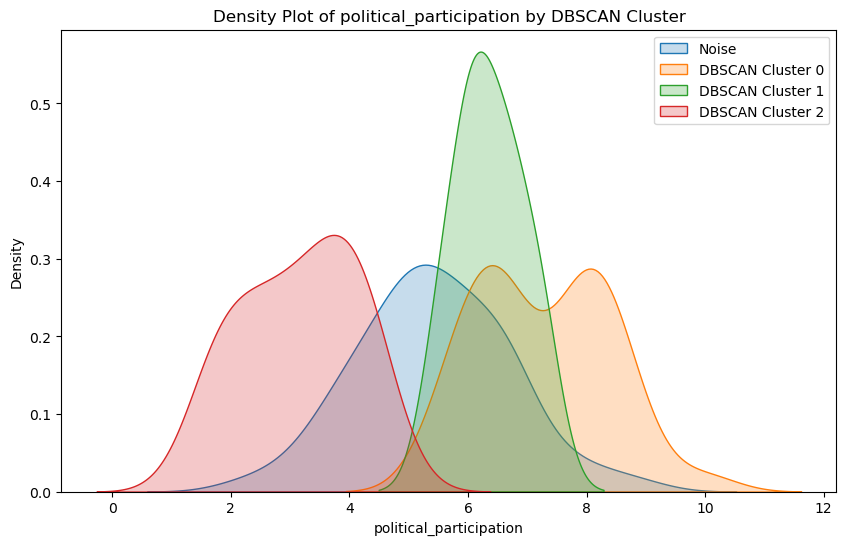

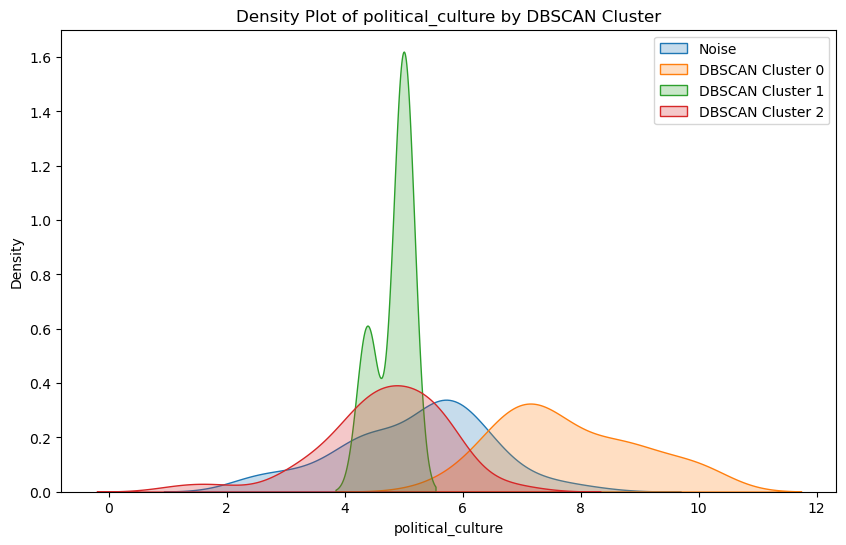

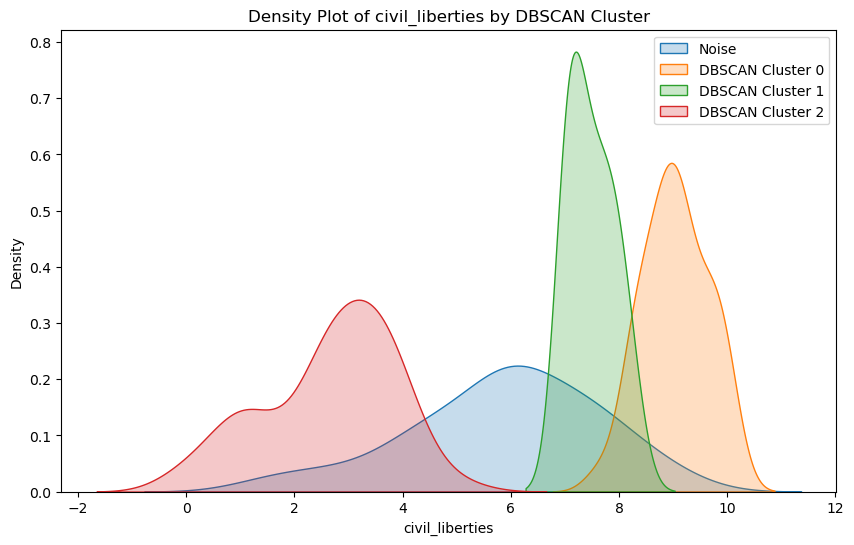

In [17]:
## Dendrogram of different linkage methods using DBScan and nearest neighbors


from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Define linkage methods to use for Agglomerative Clustering
linkage_methods = ['ward', 'average', 'complete', 'single']

# Perform Agglomerative Clustering for each linkage method and plot dendrograms
for method in linkage_methods:
    hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage=method)
    cluster_labels = hc.fit_predict(normalized_criteria)
    df_cleaned[method + '_Cluster'] = cluster_labels

    # Generate dendrogram
    Z = linkage(normalized_criteria, method=method)
    plt.figure(figsize=(12, 7))
    dendrogram(Z)
    plt.title(f'Dendrogram for {method.capitalize()} Linkage')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

# Use NearestNeighbors to find the optimal eps
nearest_neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors = nearest_neighbors.fit(normalized_criteria)
distances, indices = neighbors.kneighbors(normalized_criteria)

# Sort the distances
distances = np.sort(distances[:, min_samples-1], axis=0)

# Plot the distances
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('Sorted Distances to Nearest Neighbors')
plt.xlabel('Point Index')
plt.ylabel(f'Distance to {min_samples}th Nearest Neighbor')
plt.grid(True)
plt.show()

# Assuming you've chosen eps = 0.3 based on the nearest neighbors plot
eps = 0.3  # Adjust based on your observation from the plot
min_samples = 6  # As discussed earlier

# Apply DBSCAN with the chosen eps
db = DBSCAN(eps=eps, min_samples=min_samples).fit(normalized_criteria)
db_labels = db.labels_
df_cleaned['DBSCAN_Cluster'] = db_labels

# Plot density plots for each criterion by DBSCAN cluster
for criterion in criteria_columns:
    plt.figure(figsize=(10, 6))
    for cluster in np.unique(db_labels):
        subset = df_cleaned[df_cleaned['DBSCAN_Cluster'] == cluster]
        # Handle noise if needed
        label = f'DBSCAN Cluster {cluster}' if cluster != -1 else 'Noise'
        sns.kdeplot(subset[criterion], fill=True, label=label)
    plt.title(f'Density Plot of {criterion} by DBSCAN Cluster')
    plt.xlabel(criterion)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


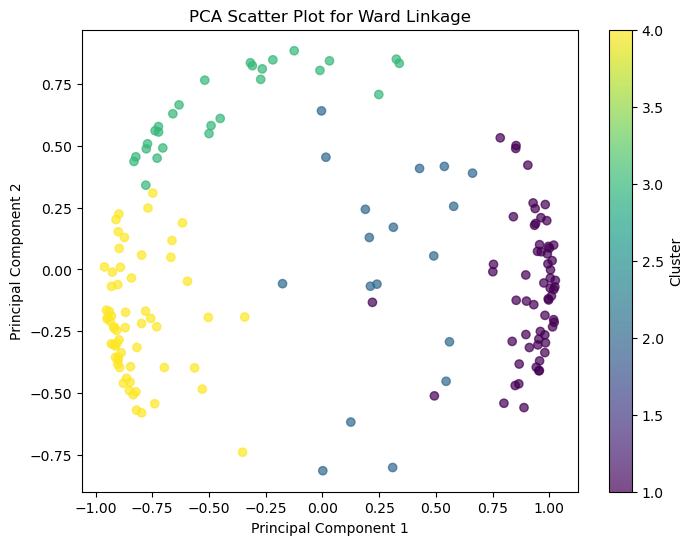

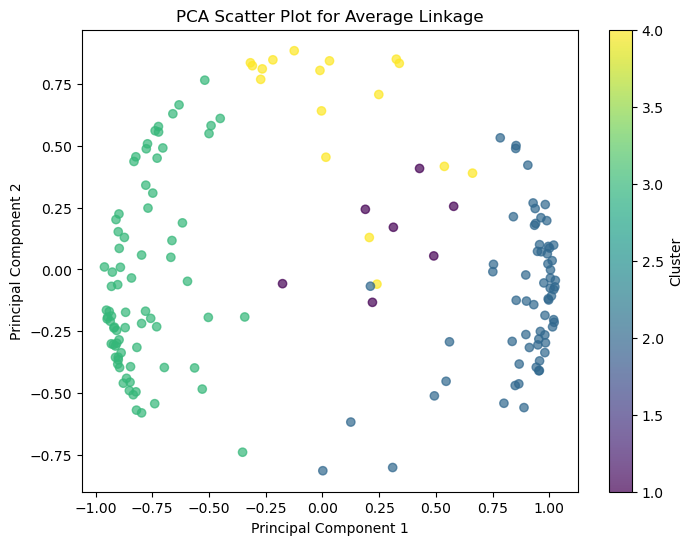

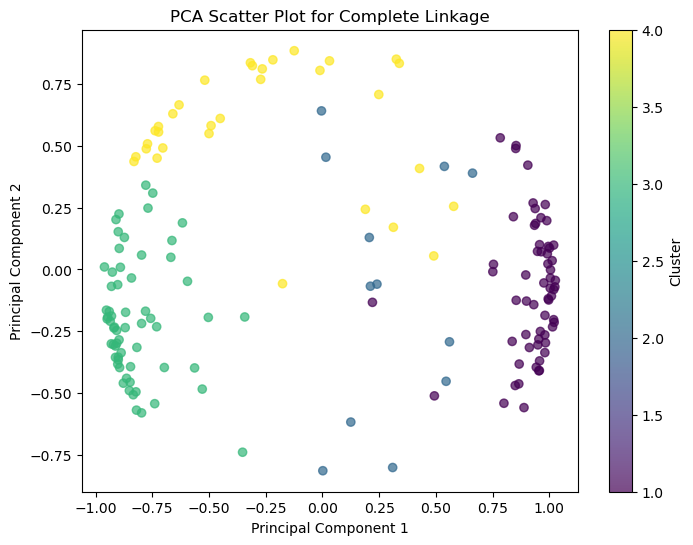

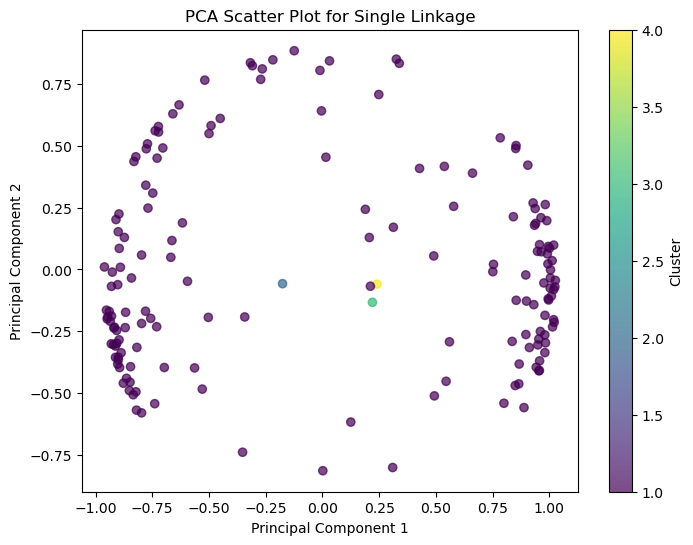

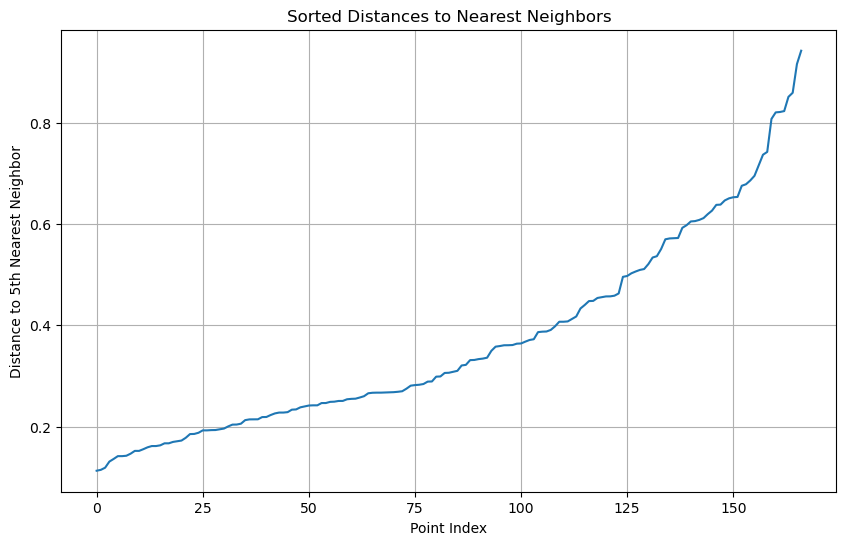

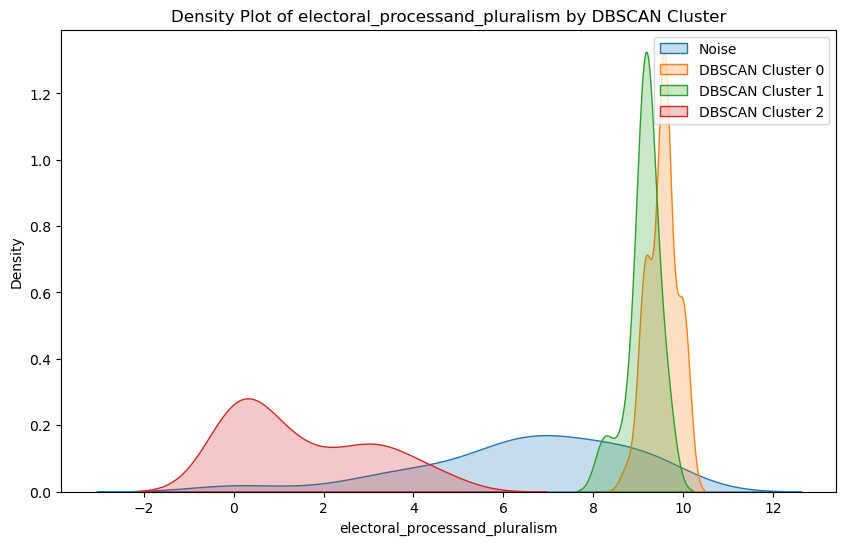

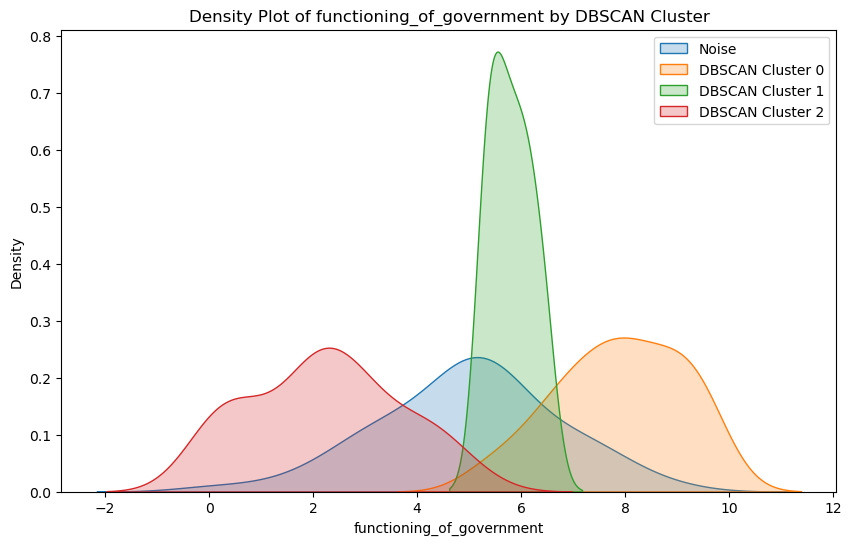

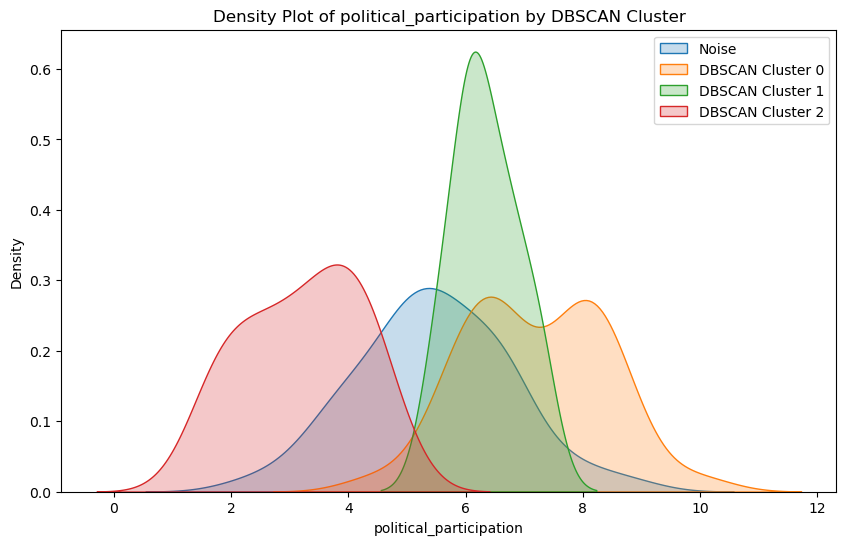

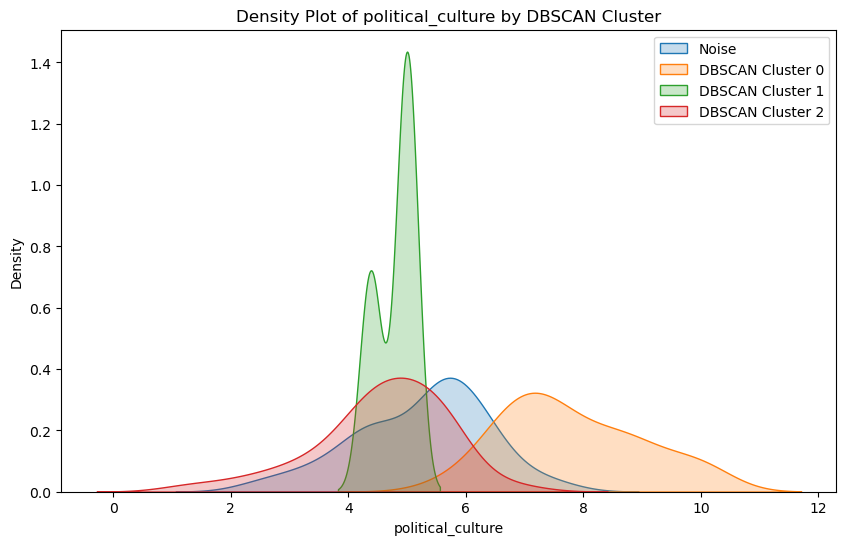

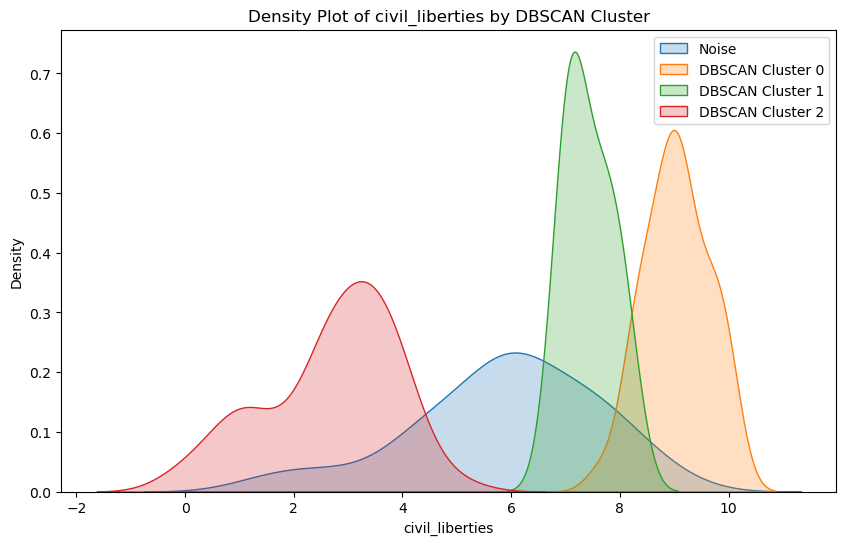

In [18]:
## Scatter Plot of different linkage methods using DBScan and nearest neighbors

from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import fcluster, linkage
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Number of clusters to form for hierarchical clustering
n_clusters = 4

# Perform dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(normalized_criteria)

# Hierarchical clustering and PCA scatter plots
for method in linkage_methods:
    # Compute the linkage matrix
    Z = linkage(normalized_criteria, method=method)
    
    # Determine cluster labels
    cluster_labels = fcluster(Z, t=n_clusters, criterion='maxclust')
    
    # Scatter plot of the PCA-reduced data, colored by cluster labels
    plt.figure(figsize=(8, 6))
    plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='viridis', marker='o', alpha=0.7)
    plt.title(f'PCA Scatter Plot for {method.capitalize()} Linkage')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster')
    plt.show()

# NearestNeighbors to find the optimal eps
min_samples = 6  # min_samples should be categories +1
nearest_neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors = nearest_neighbors.fit(normalized_criteria)
distances, indices = neighbors.kneighbors(normalized_criteria)

# Sort the distances
distances = np.sort(distances[:, min_samples-1], axis=0)

# Plot the distances to determine a good eps value
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('Sorted Distances to Nearest Neighbors')
plt.xlabel('Point Index')
plt.ylabel(f'Distance to {min_samples}th Nearest Neighbor')
plt.grid(True)
plt.show()

# Eps based on the plot
eps = 0.3  # Adjust this value based on your plot observation

# Apply DBSCAN with the chosen eps
db = DBSCAN(eps=eps, min_samples=min_samples).fit(normalized_criteria)
db_labels = db.labels_
df_cleaned['DBSCAN_Cluster'] = db_labels

# Plot density plots for each criterion by DBSCAN cluster
for criterion in criteria_columns:
    plt.figure(figsize=(10, 6))
    for cluster in np.unique(db_labels):
        subset = df_cleaned[df_cleaned['DBSCAN_Cluster'] == cluster]
        label = f'DBSCAN Cluster {cluster}' if cluster != -1 else 'Noise'
        sns.kdeplot(subset[criterion], fill=True, label=label)
    plt.title(f'Density Plot of {criterion} by DBSCAN Cluster')
    plt.xlabel(criterion)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

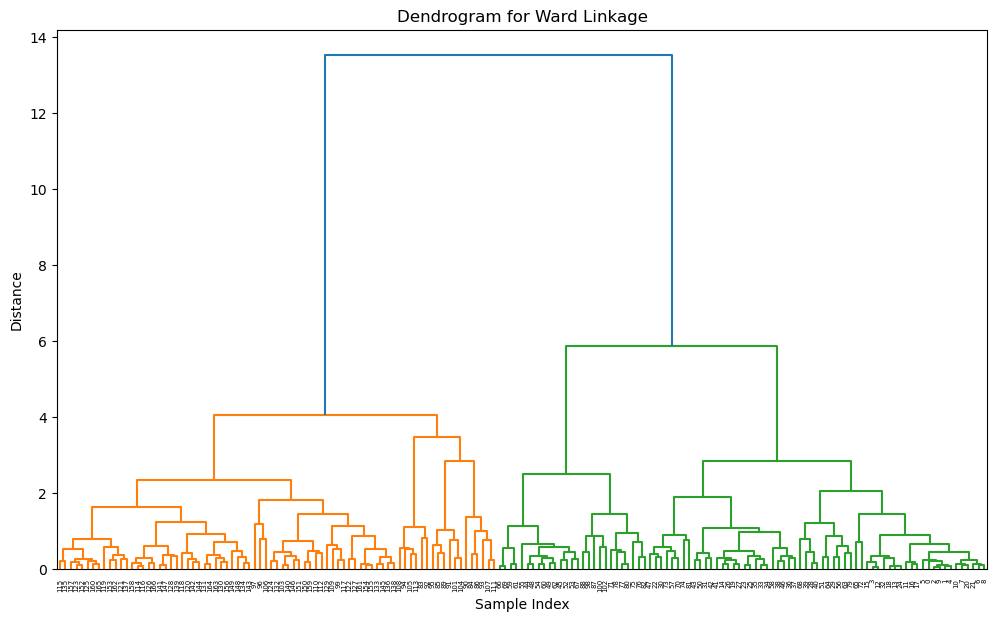

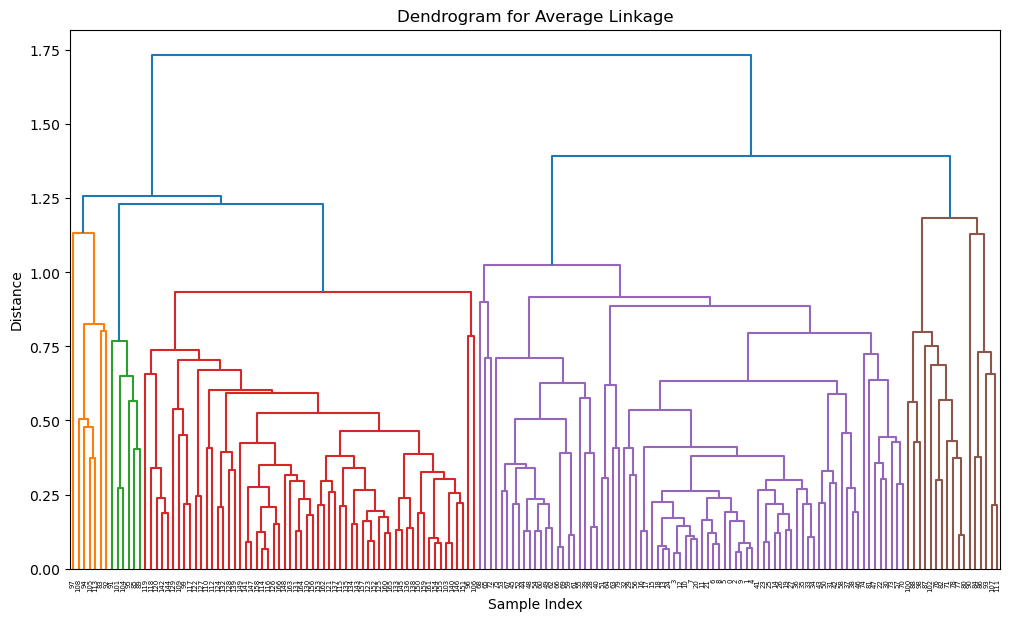

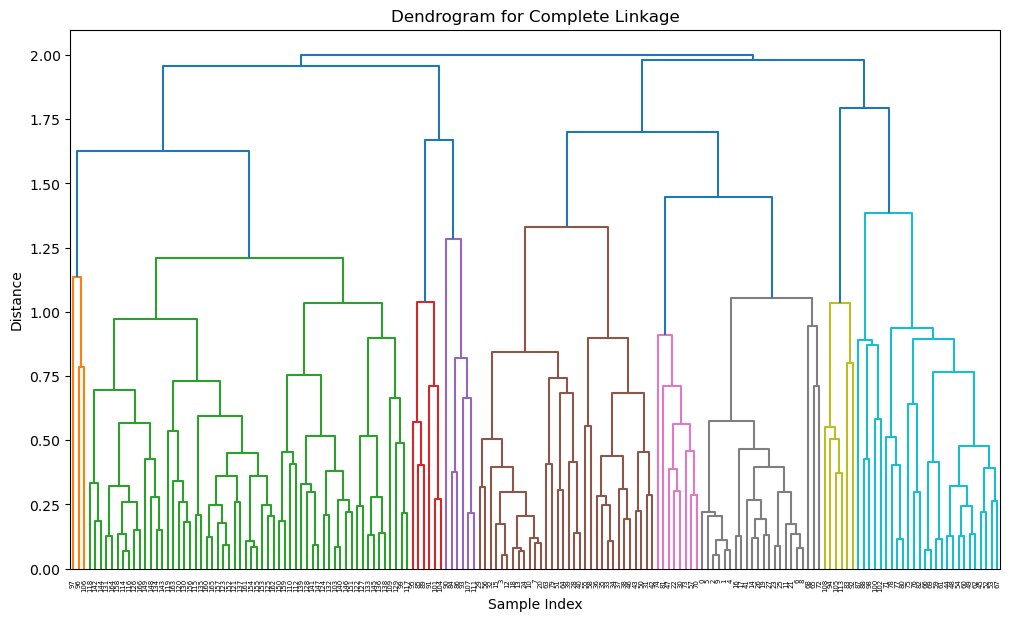

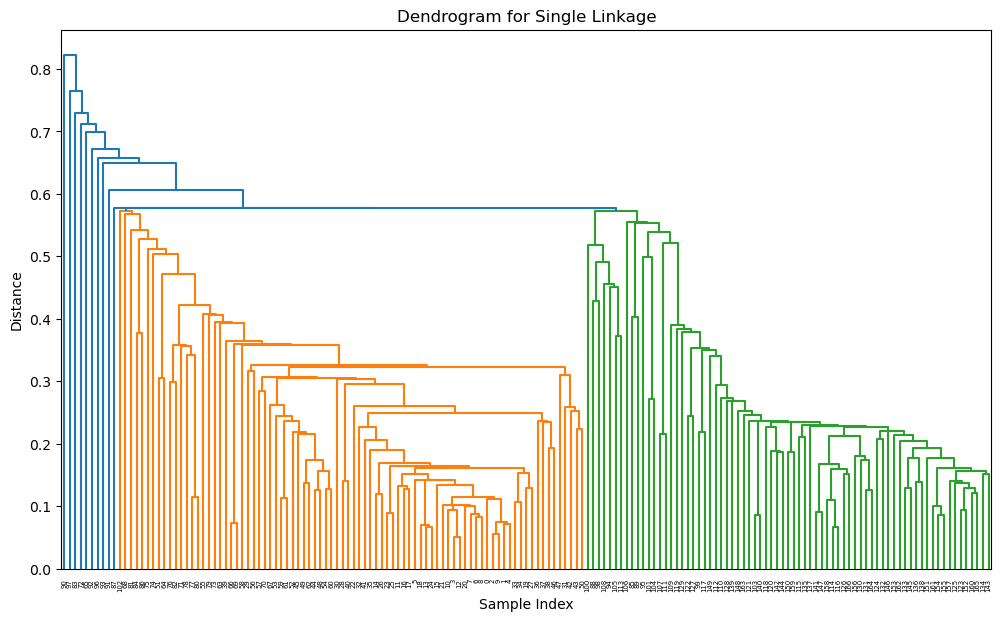

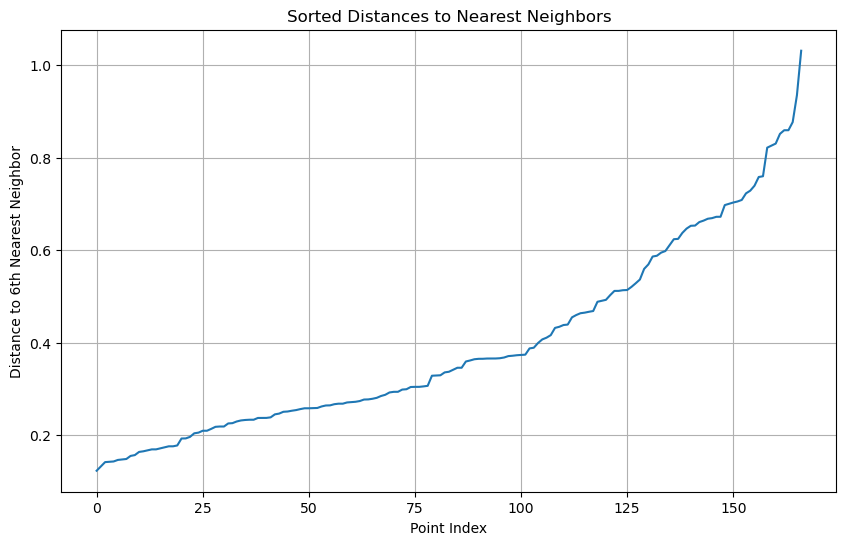

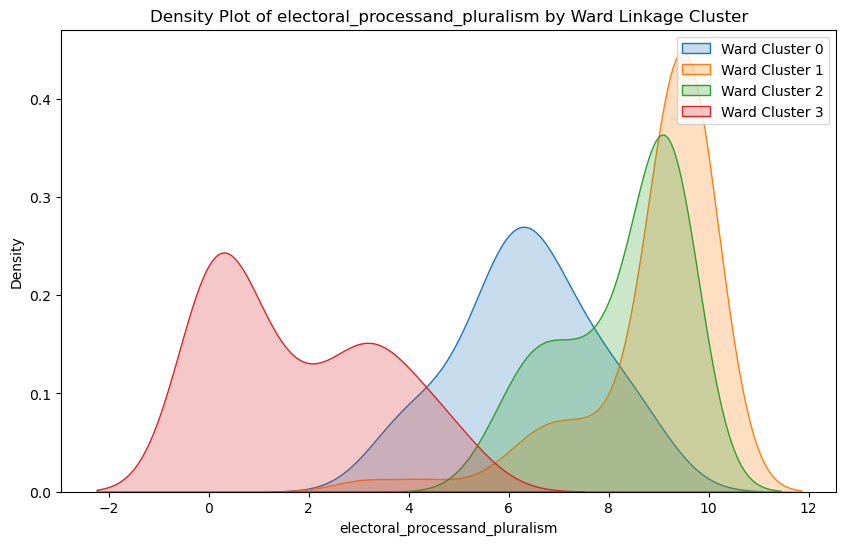

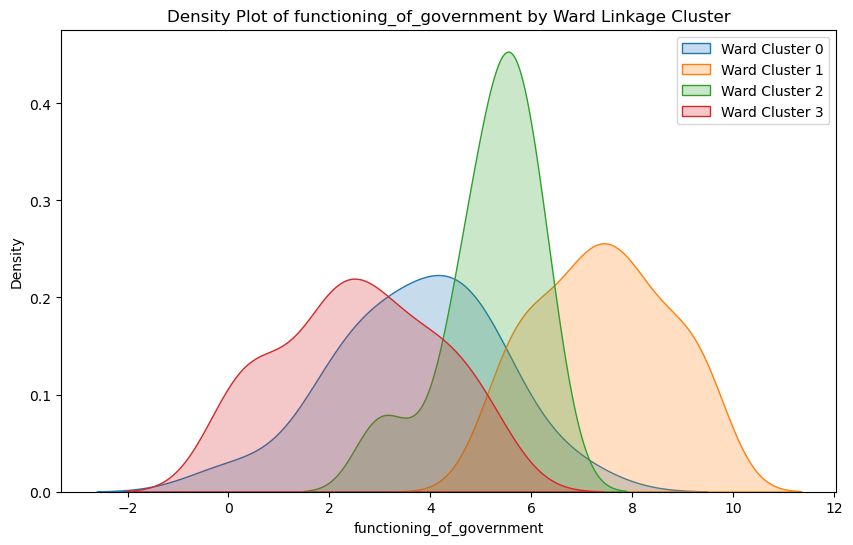

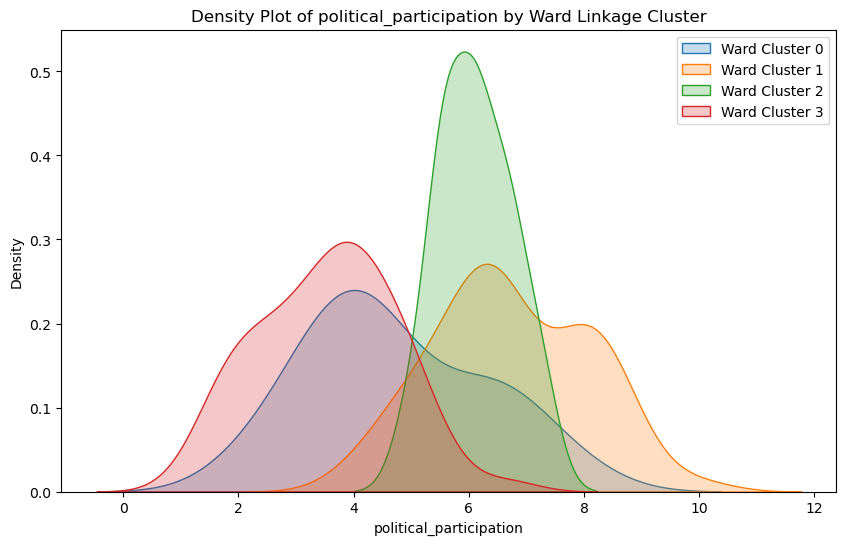

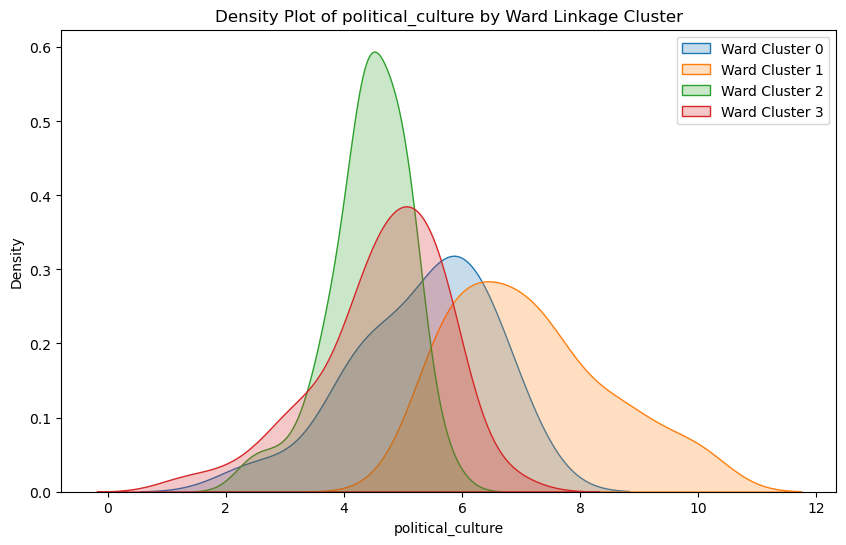

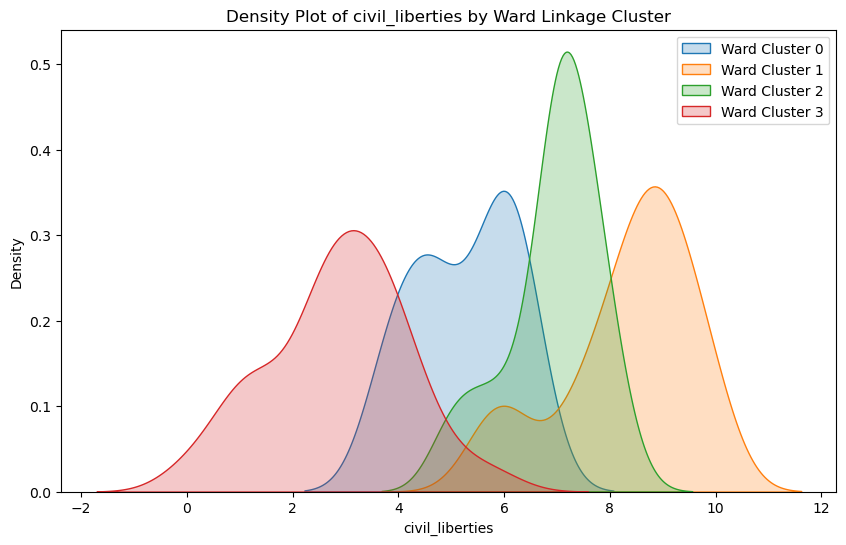

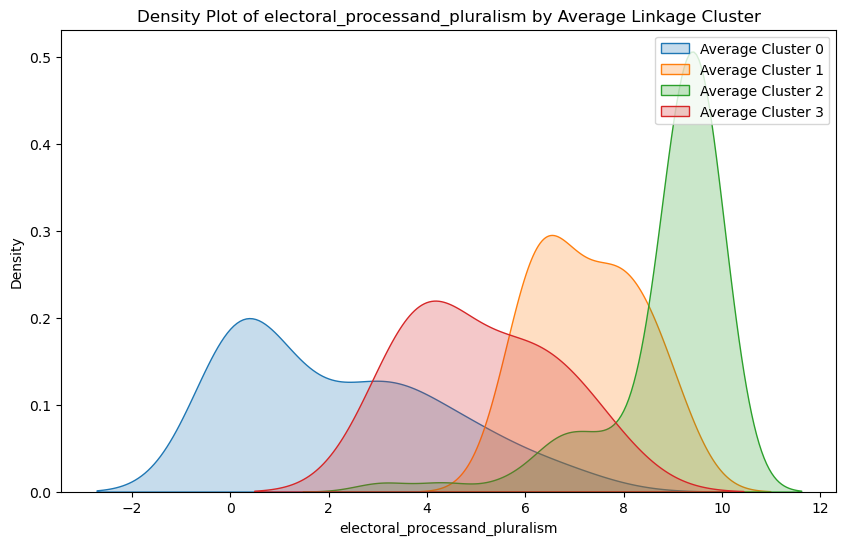

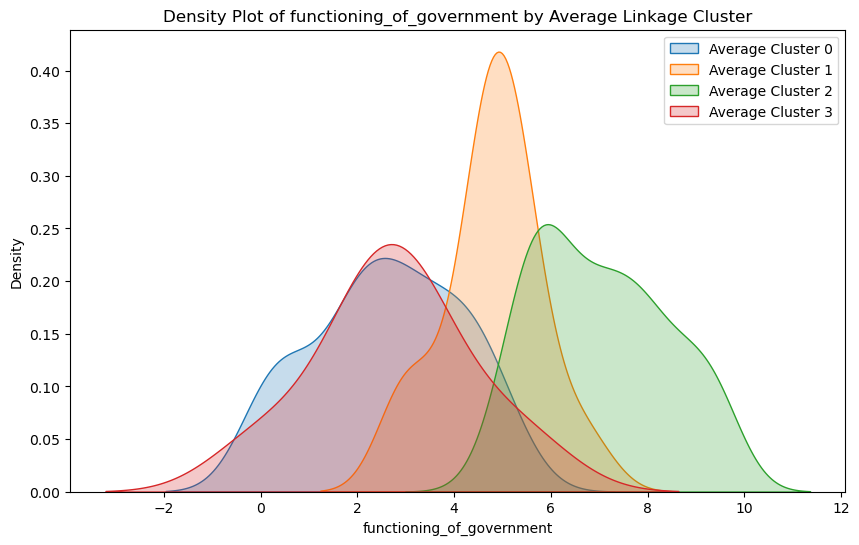

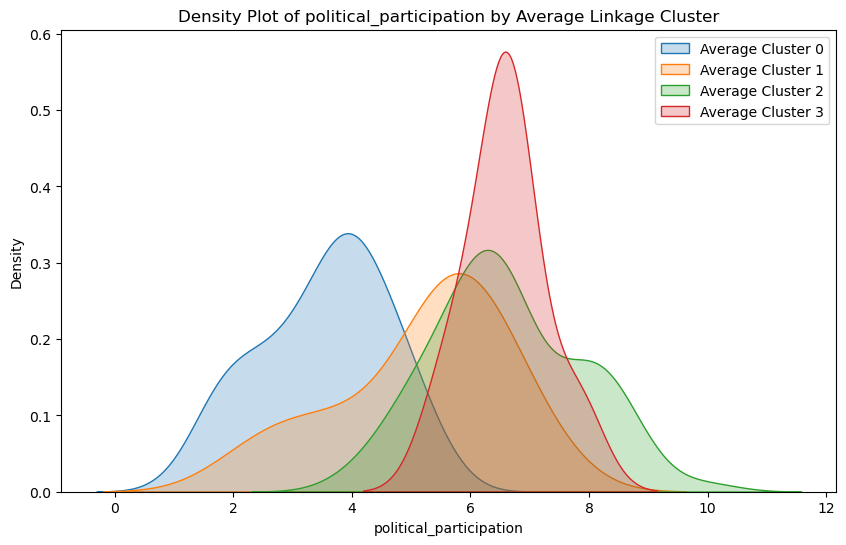

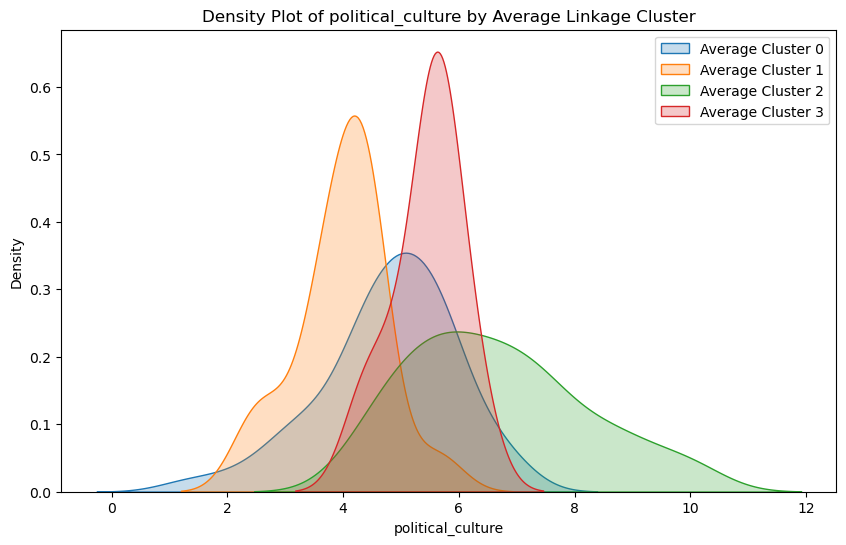

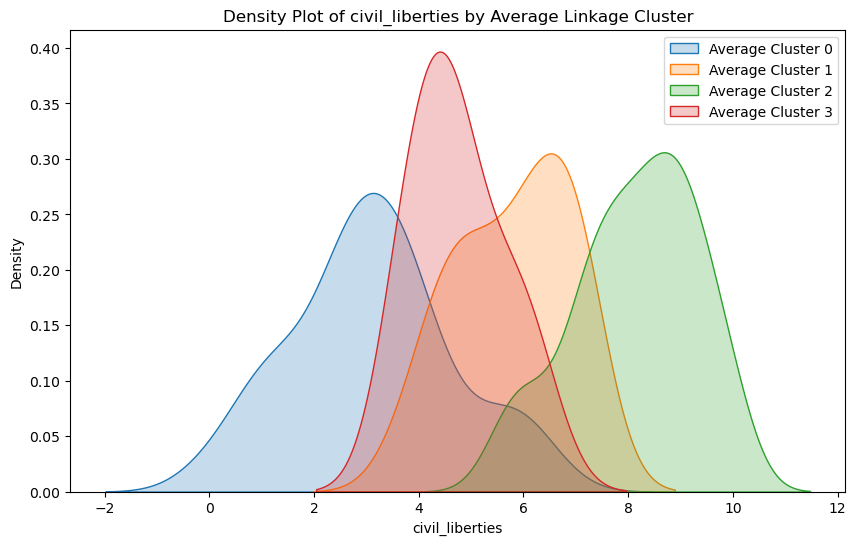

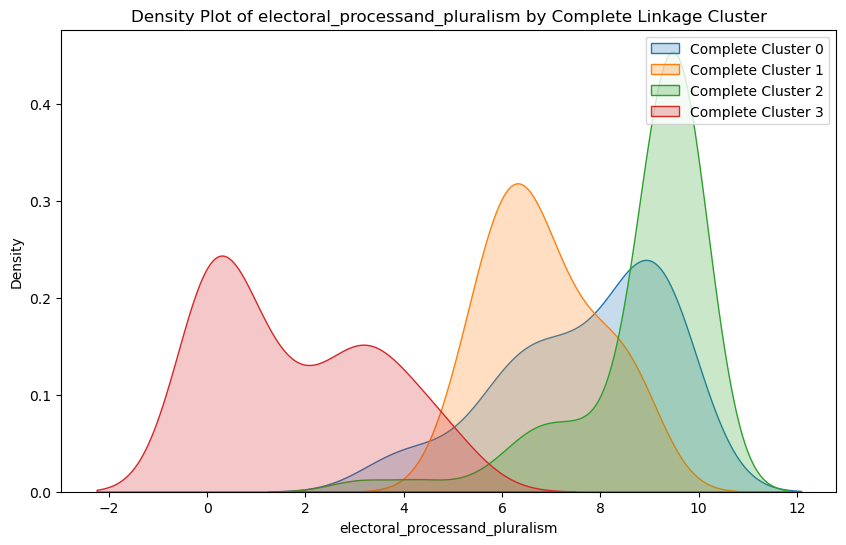

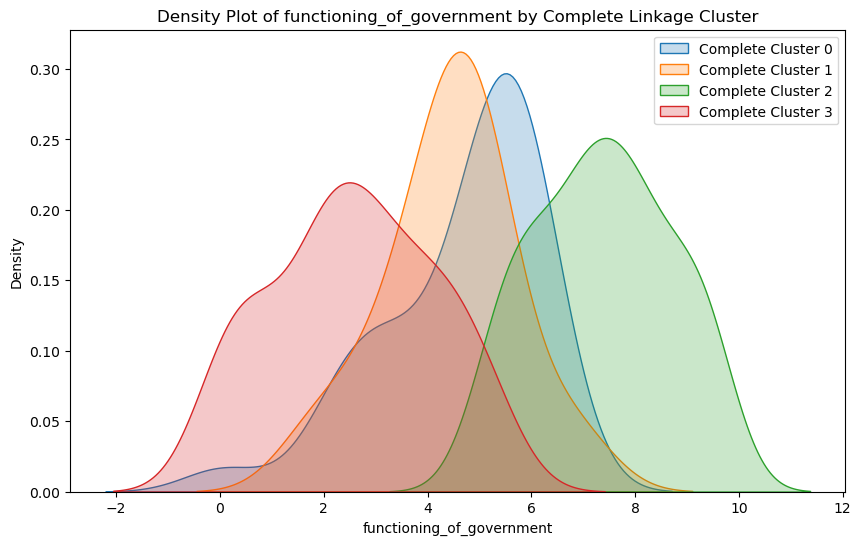

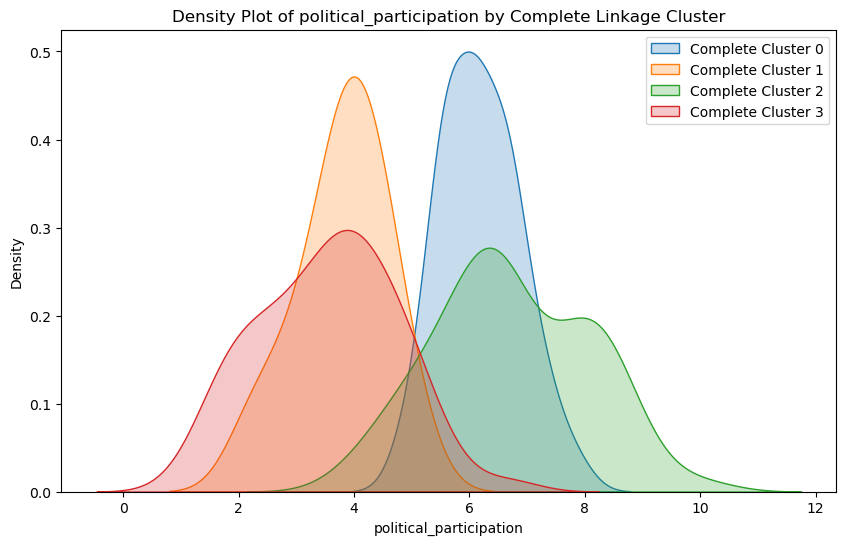

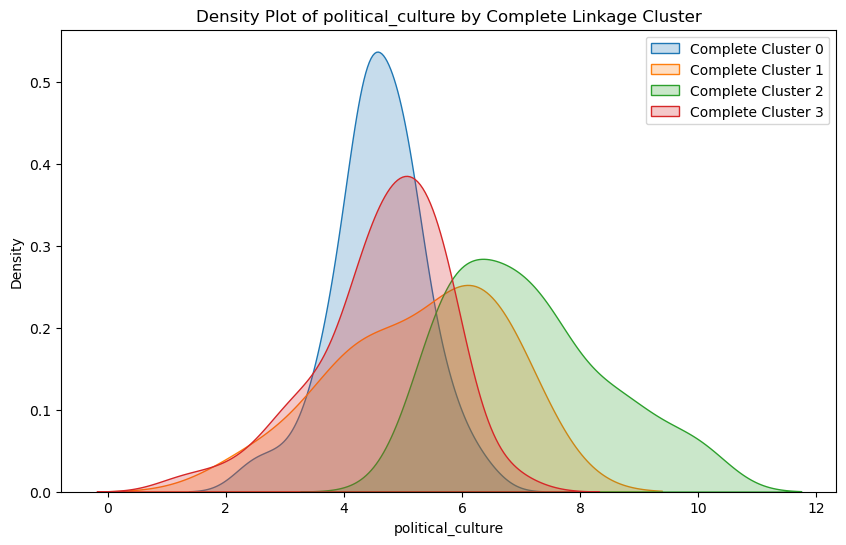

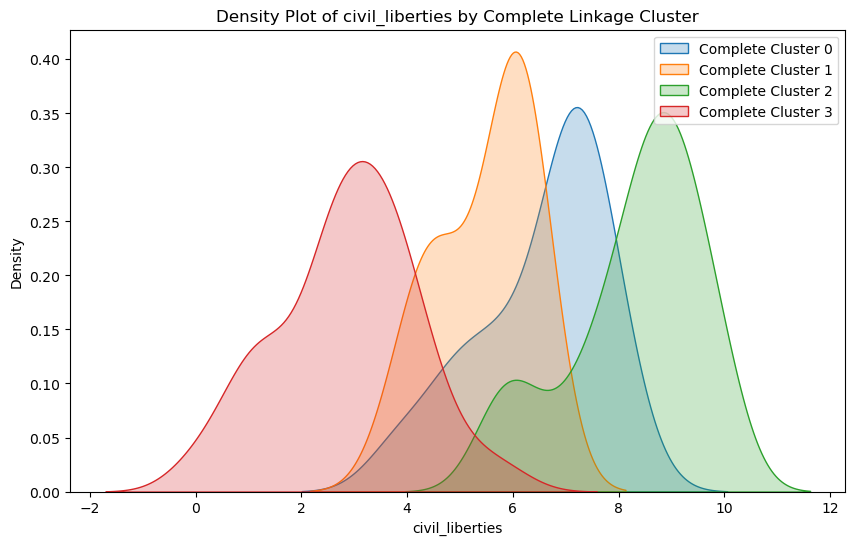

/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/1360939974.py:67: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=label)
/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/1360939974.py:67: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=label)
/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/1360939974.py:67: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=label)


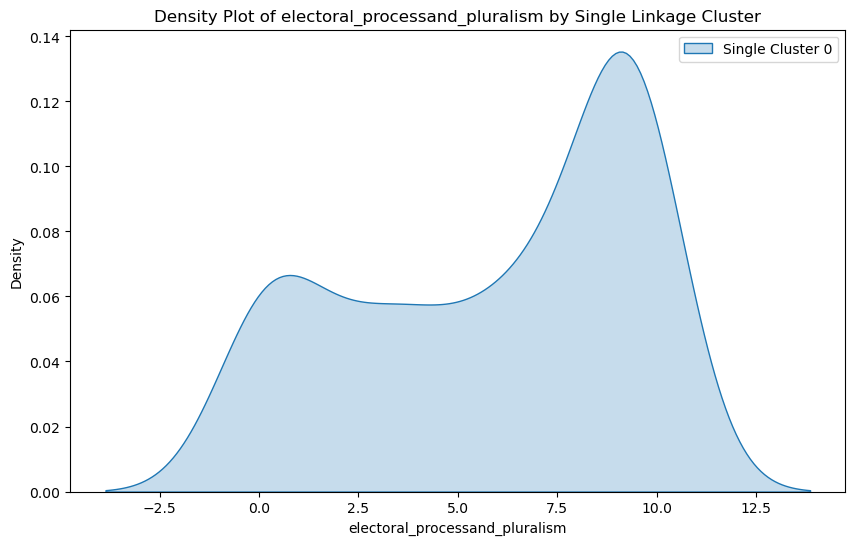

/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/1360939974.py:67: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=label)
/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/1360939974.py:67: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=label)
/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/1360939974.py:67: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=label)


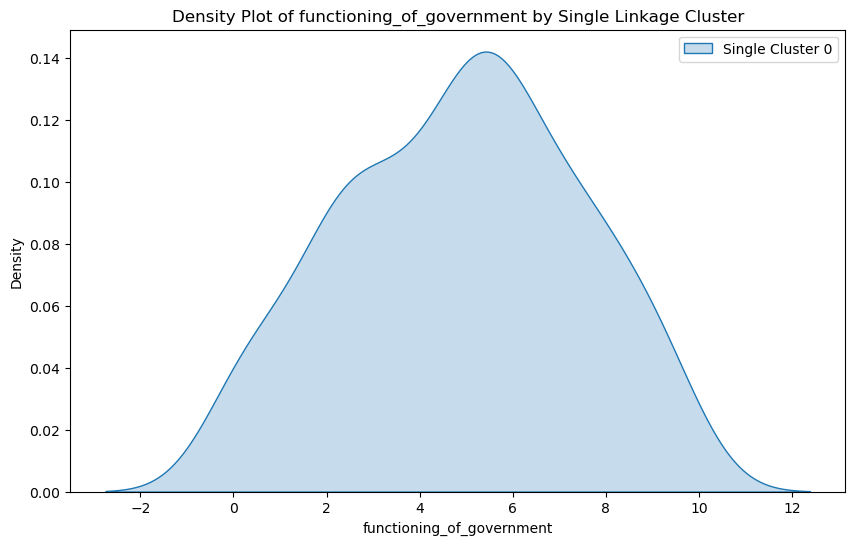

/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/1360939974.py:67: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=label)
/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/1360939974.py:67: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=label)
/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/1360939974.py:67: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=label)


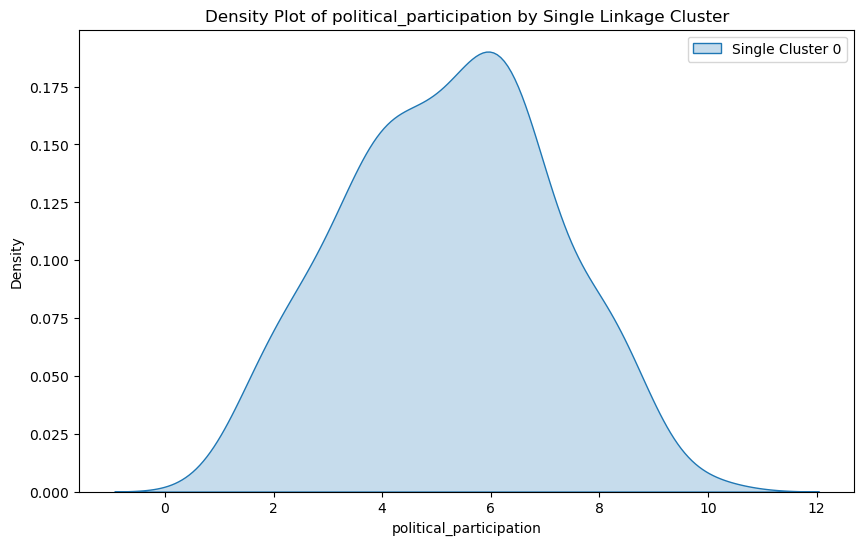

/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/1360939974.py:67: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=label)
/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/1360939974.py:67: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=label)
/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/1360939974.py:67: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=label)


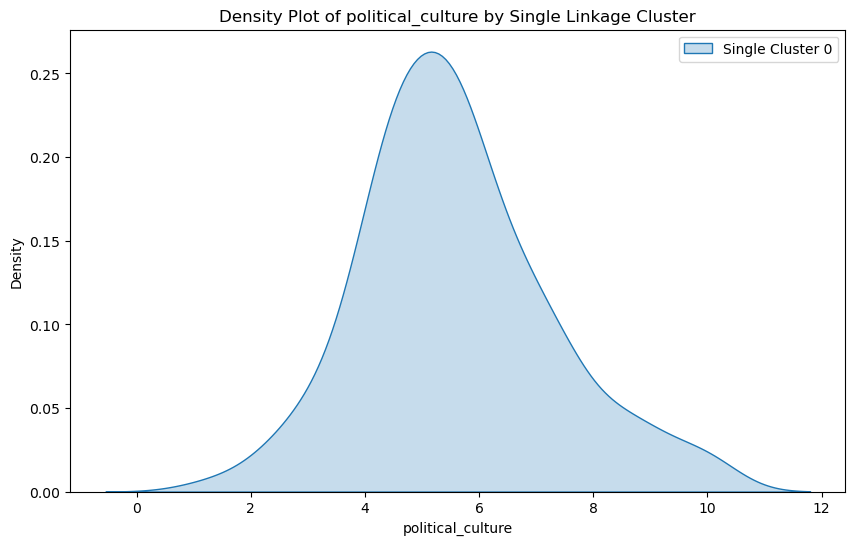

/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/1360939974.py:67: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=label)
/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/1360939974.py:67: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=label)
/var/folders/h7/snvt51jx0455mchr4g332qxr0000gn/T/ipykernel_25679/1360939974.py:67: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[criterion], fill=True, label=label)


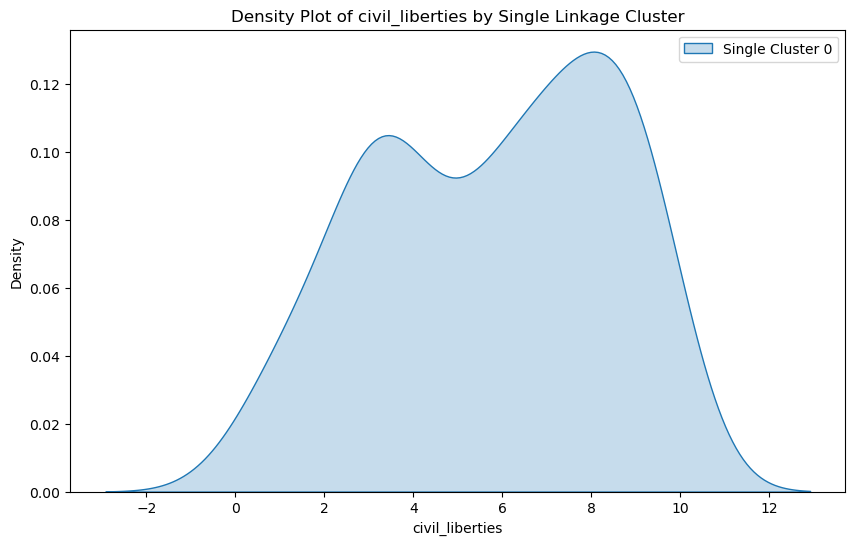

In [21]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define linkage methods to use for Agglomerative Clustering
linkage_methods = ['ward', 'average', 'complete', 'single']

# Perform Agglomerative Clustering for each linkage method and plot dendrograms
for method in linkage_methods:
    hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage=method)
    cluster_labels = hc.fit_predict(normalized_criteria)
    df_cleaned[method + '_Cluster'] = cluster_labels

    # Generate dendrogram
    Z = linkage(normalized_criteria, method=method)
    plt.figure(figsize=(12, 7))
    dendrogram(Z)
    plt.title(f'Dendrogram for {method.capitalize()} Linkage')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

# Use NearestNeighbors to perform the elbow scan for determining eps
min_samples = 6  # min_samples should be categories+1, adjust as necessary
nearest_neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors = nearest_neighbors.fit(normalized_criteria)
distances, indices = neighbors.kneighbors(normalized_criteria)

# Sort the distances
distances = np.sort(distances[:, min_samples-1], axis=0)

# Plot the distances
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('Sorted Distances to Nearest Neighbors')
plt.xlabel('Point Index')
plt.ylabel(f'Distance to {min_samples}th Nearest Neighbor')
plt.grid(True)
plt.show()

# Setting eps based on elbow method
eps = 0.3  # Adjust based on elbow plot

# Apply DBSCAN with the chosen eps
db = DBSCAN(eps=eps, min_samples=min_samples).fit(normalized_criteria)
db_labels = db.labels_
df_cleaned['DBSCAN_Cluster'] = db_labels

# Plot density plots for each criterion by each linkage method's cluster
for method in linkage_methods:
    cluster_column = method + '_Cluster'  # Column name for clusters from this linkage method

    # Loop through each criterion
    for criterion in criteria_columns:
        plt.figure(figsize=(10, 6))

        # Get unique clusters for this method
        unique_clusters = np.unique(df_cleaned[cluster_column])

        # Loop through each cluster to plot the density
        for cluster in unique_clusters:
            subset = df_cleaned[df_cleaned[cluster_column] == cluster]
            label = f'{method.capitalize()} Cluster {cluster}'
            sns.kdeplot(subset[criterion], fill=True, label=label)

        plt.title(f'Density Plot of {criterion} by {method.capitalize()} Linkage Cluster')
        plt.xlabel(criterion)
        plt.ylabel('Density')
        plt.legend()
        plt.show()
